# CREDIT CARD FRAUD DETECTION CAPTSTONE PROJECT

## Data Description
### The datasets contains transactions made by credit cards in September 2013 owned by European Credit Card Holders. The transactions occur over a period of two days.
### The Dataset contains features V1, V2, ... V28, which are the Principal Components derived after applying PCA.
### The feature 'Time' implies the seconds elapsed between the first transaction and the subsequent ones in the dataset.
### The feature 'Amount' is the Amount of transaction.
### The feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [26]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
import matplotlib.ticker as ticker
import itertools
import datetime
from collections import Counter

from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

from sklearn import metrics
from sklearn import model_selection

sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# To ignore warnings

import warnings
warnings.filterwarnings("ignore")

# EXPLORING THE DATA

In [86]:
# Loading and Reviewing the data into dataframe

CC_df=pd.read_csv("creditcard.csv")
print("Number of instances: %d" % CC_df.shape[0])
print("Number of features: %d" % CC_df.shape[1])
CC_df.head(10)

Number of instances: 284807
Number of features: 31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [87]:
CC_df.dtypes
# Other than Class all other feature are floats. Class is an int. 

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Checking for Missing Values

In [88]:
# Missing Values
na_perc = {}
for col in CC_df.columns:
    na_perc[col] = CC_df[col].isnull().sum()*100/len(CC_df)
na_perc

# No missing values observed

{'Time': 0.0,
 'V1': 0.0,
 'V2': 0.0,
 'V3': 0.0,
 'V4': 0.0,
 'V5': 0.0,
 'V6': 0.0,
 'V7': 0.0,
 'V8': 0.0,
 'V9': 0.0,
 'V10': 0.0,
 'V11': 0.0,
 'V12': 0.0,
 'V13': 0.0,
 'V14': 0.0,
 'V15': 0.0,
 'V16': 0.0,
 'V17': 0.0,
 'V18': 0.0,
 'V19': 0.0,
 'V20': 0.0,
 'V21': 0.0,
 'V22': 0.0,
 'V23': 0.0,
 'V24': 0.0,
 'V25': 0.0,
 'V26': 0.0,
 'V27': 0.0,
 'V28': 0.0,
 'Amount': 0.0,
 'Class': 0.0}

### Linear Correlation between the Features

Text(0.5, 1.0, 'Correlation Heatmap for the Features')

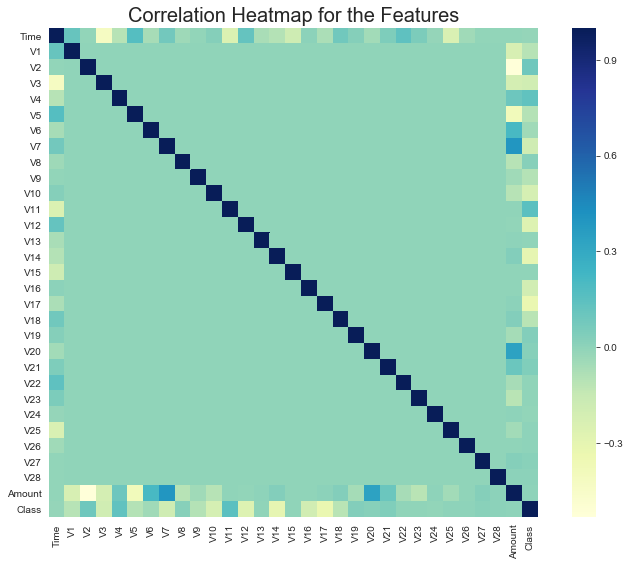

In [89]:
corrmat = CC_df.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square = True, cmap = 'YlGnBu')
plt.title('Correlation Heatmap for the Features', fontsize=20)

### As expected, being mostly Principal Components, linear correlation between features is insignificant 
### and close to zero in most cases 

### However, there are three exceptions, where we see moderate correlation between features

### While these correlations are relatively high in comparison to the others, it is not high enough to run the risk of multicollinearity.

## Analysing the distribution of "Class" feature 

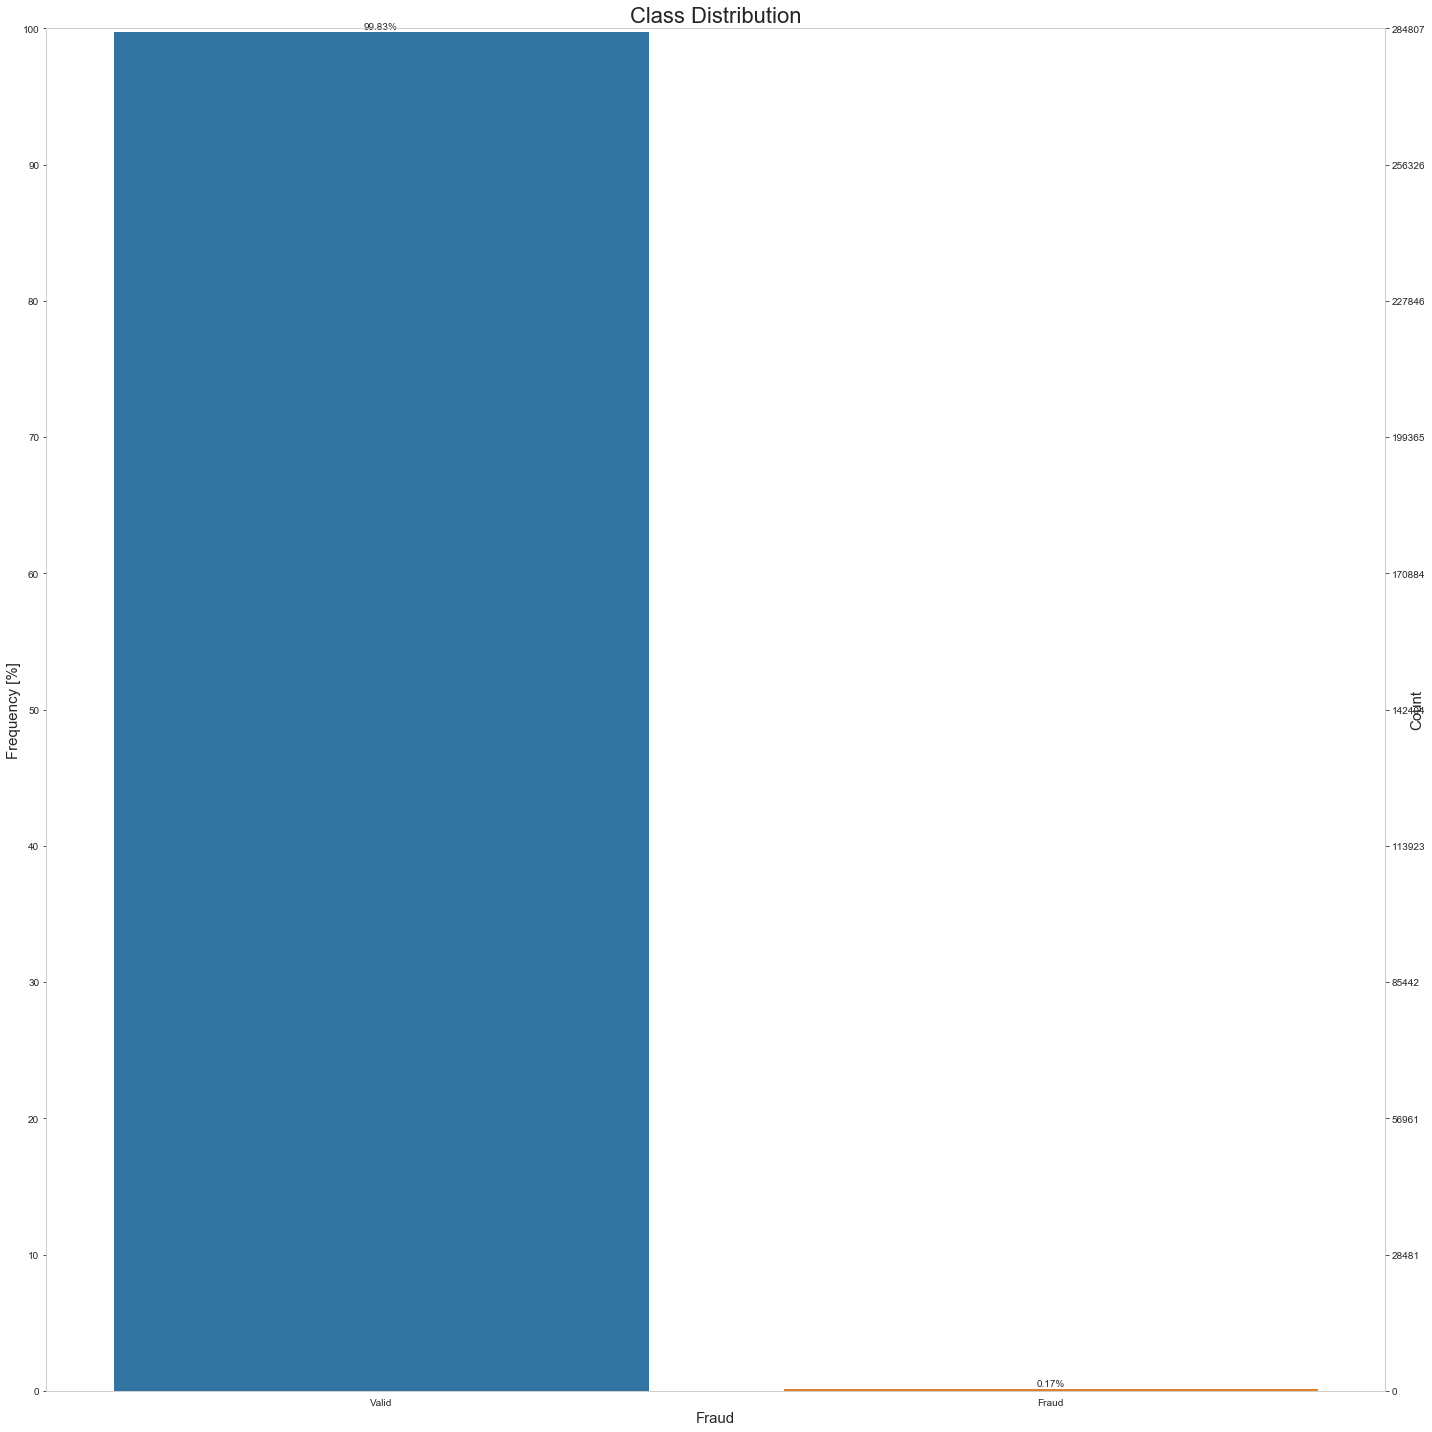

In [90]:
map_dict = {0:"Valid", 1:"Fraud"}
CC_df['Class'] = CC_df['Class'].map(map_dict)
ncount = len(CC_df)

plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.countplot(x = 'Class', data = CC_df)
#g.set_xticklabels(labels,rotation = 90)
plt.title("Class Distribution", fontsize=22)
g.set_xlabel('Fraud', fontsize=15)
g.set_ylabel('Frequency [%]', fontsize=15, labelpad=25)
g.axes.grid('off')

g2 = g.twinx()
g2.yaxis.tick_left()
g.yaxis.tick_right()

for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

g.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
g2.set_ylim(0,100)
g.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
g2.yaxis.set_major_locator(ticker.MultipleLocator(10))
g2.set_ylabel('Count', fontsize=15, labelpad=25)
g2.axes.grid('off')
plt.tight_layout()

# 99.83% are valid transactions; Around 0.17% are Fraud transactions. Hence data is highly imbalanced.

### Distribution of "Amount" by "Class"

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06]), <a list of 9 Text yticklabel objects>)

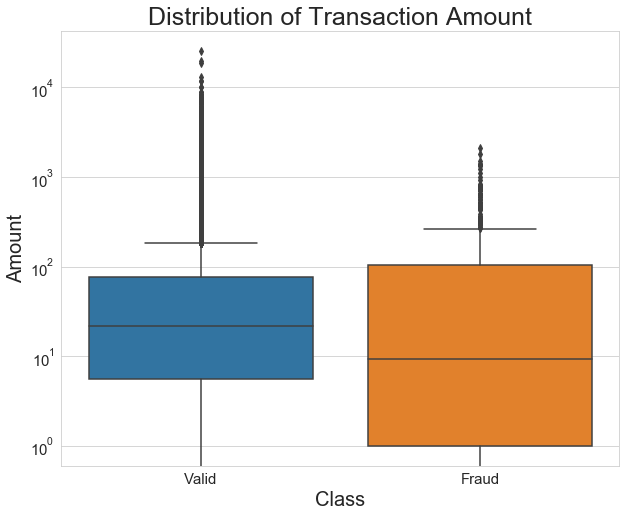

In [91]:
# Analysis of fraud by the total amount spent
plt.figure()
plt.yscale('log')
sns.set_context({"figure.figsize": (10, 8)})
g = sns.boxplot(data = CC_df, x = 'Class', y = 'Amount')
plt.title("Distribution of Transaction Amount", fontsize=25)
plt.xlabel('Class', fontsize=20); plt.xticks(fontsize=15)
plt.ylabel('Amount', fontsize=20); plt.yticks(fontsize=15)

# It appears that the fraudsters commit frauds in terms of multiple transactions of smaller amounts (around 100)
# rather than few large transactions. There are however, few outliers with larger transactions (around 1000). 

In [92]:
# Dropping time variable [seconds elapsed from first transaction] as we think it might not be useful for our modelling.
CC_df.drop(['Time'],axis=1,inplace=True)

# PREPARING THE DATA FOR MODELLING

### Test - Train Split

In [93]:
# Mapping valid transactions as 0 and Fraud transactions as 1
map_dict = {"Valid":0, "Fraud":1}
CC_df['Class'] = CC_df['Class'].map(map_dict)

# Split the data into Test and Train
from sklearn.model_selection import train_test_split 
CC_df_train,CC_df_test = train_test_split(CC_df,train_size=0.7,test_size=0.3,random_state=100)
print(CC_df_train.shape)
print(CC_df_test.shape)

(199364, 30)
(85443, 30)


### How balanced are the Test and Train Data?

In [94]:
# Number and % of fraud transactions in train and test

print("Number of fraud transactions in Test data: {}".format(CC_df_test[CC_df_test['Class']==1].shape[0]))
print("% of fraud transactions in Test data: {:.2f}%".format(CC_df_test[CC_df_test['Class']==1].shape[0]/CC_df[CC_df['Class']==1].shape[0]*100))

print("Number of fraud transactions in Train data: {}".format(CC_df_train[CC_df_train['Class']==1].shape[0]))
print("% of fraud transactions in Train data: {:.2f}%".format(CC_df_train[CC_df_train['Class']==1].shape[0]/CC_df[CC_df['Class']==1].shape[0]*100))

# Ensuring test data has atleast 100 fraudulent transactions

Number of fraud transactions in Test data: 142
% of fraud transactions in Test data: 28.86%
Number of fraud transactions in Train data: 350
% of fraud transactions in Train data: 71.14%


### Creating X and y Dataframes

In [95]:
# create X and y dataframes
y_train=CC_df_train.pop('Class')
X_train=CC_df_train

y_test=CC_df_test.pop('Class')
X_test=CC_df_test


### Are the Features Gaussian? We assume at least for Principal Components they are because a pre-requisite of PCA is to standardize the data

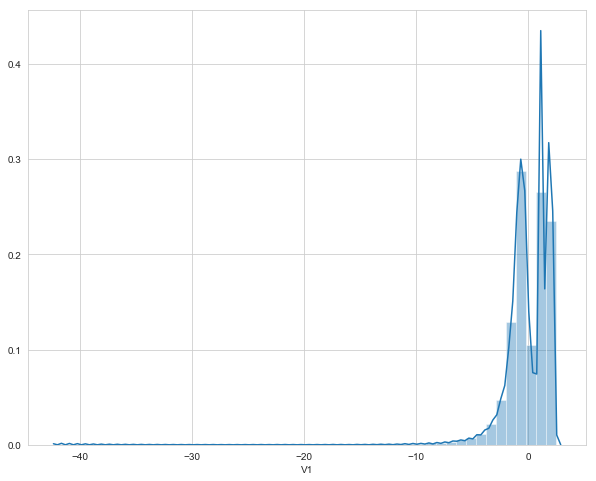

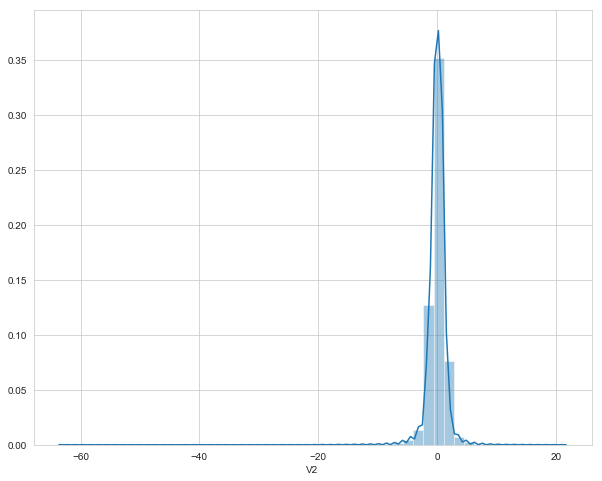

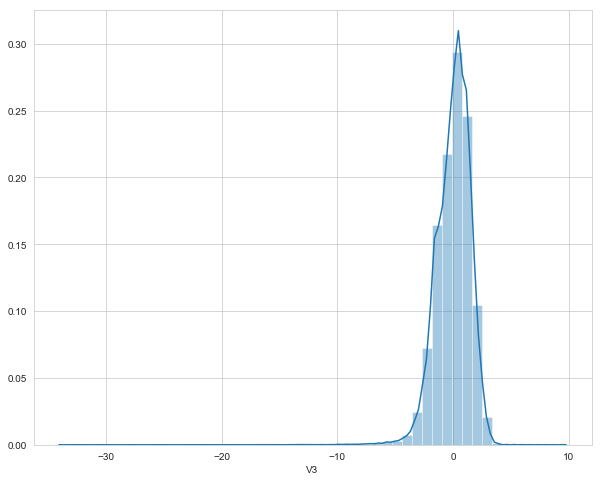

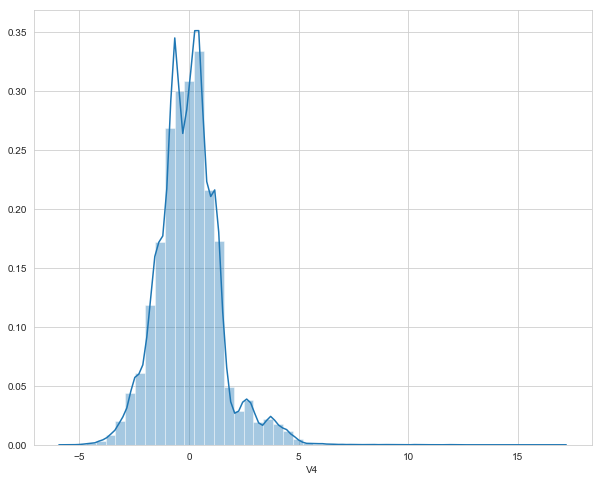

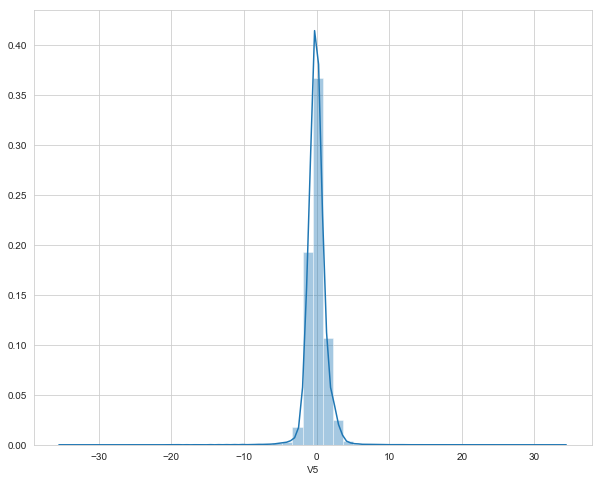

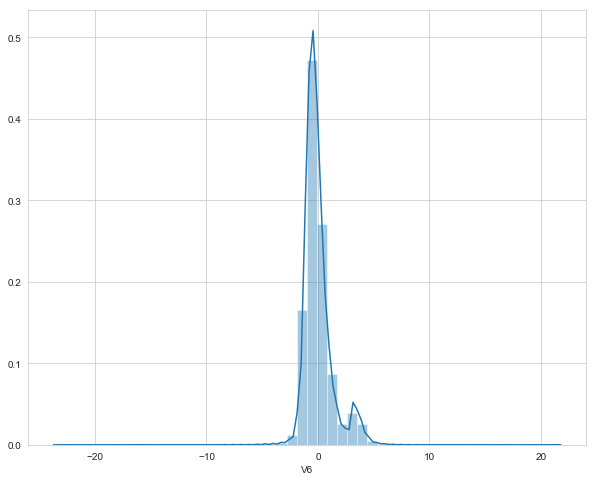

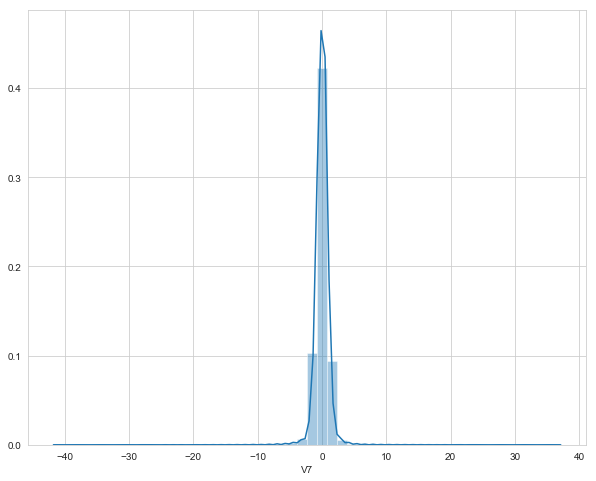

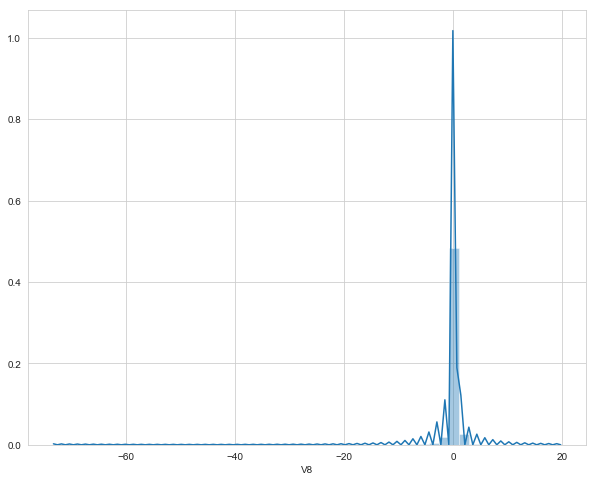

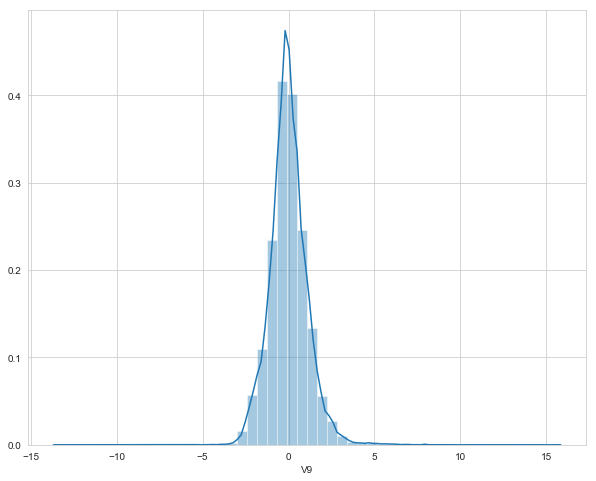

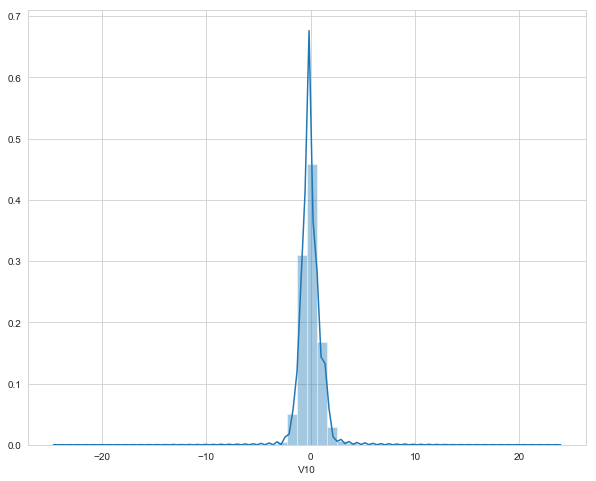

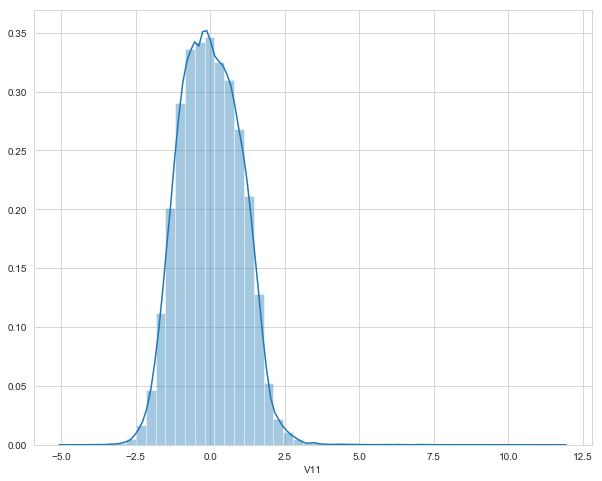

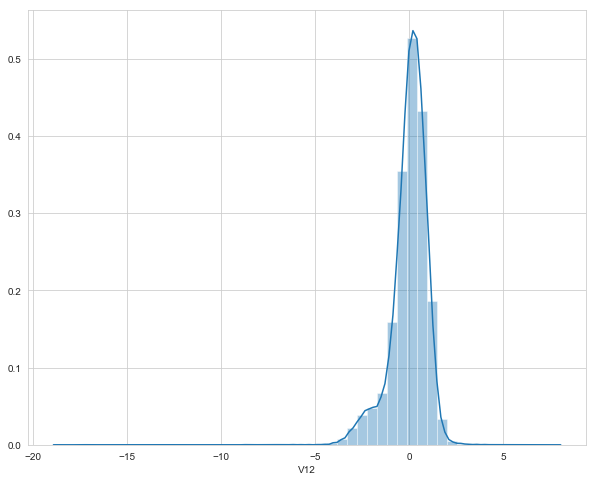

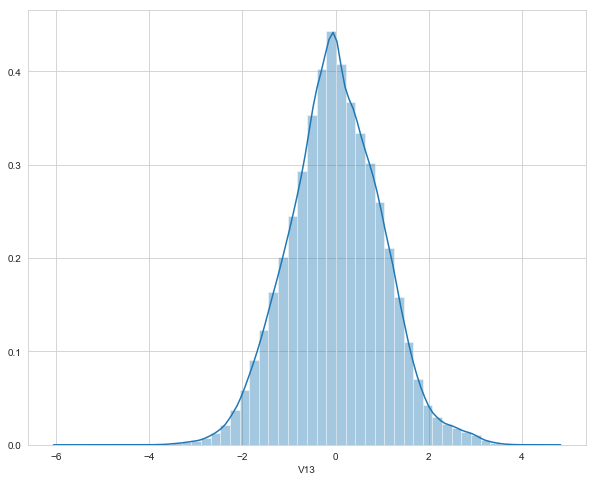

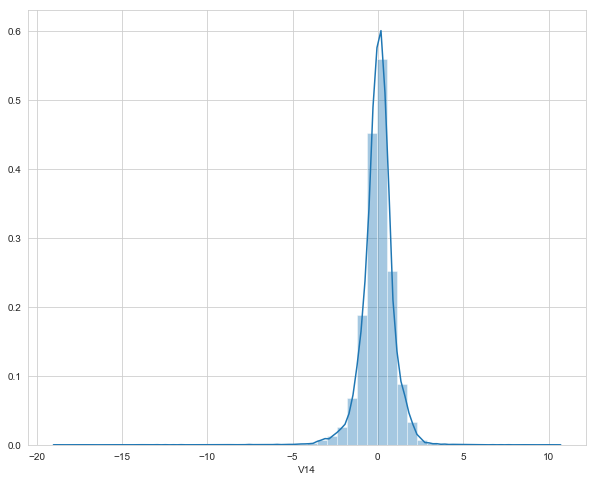

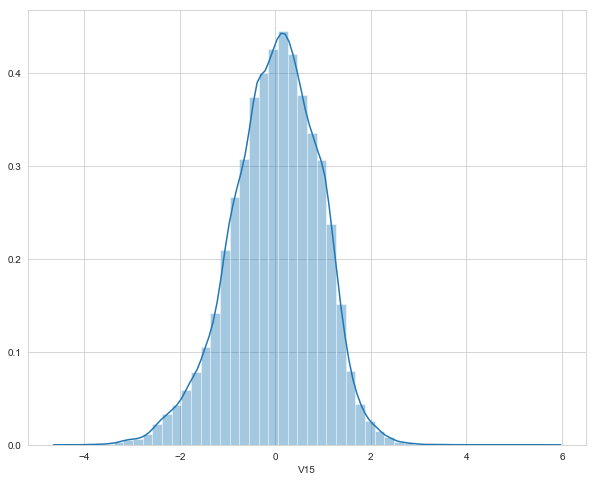

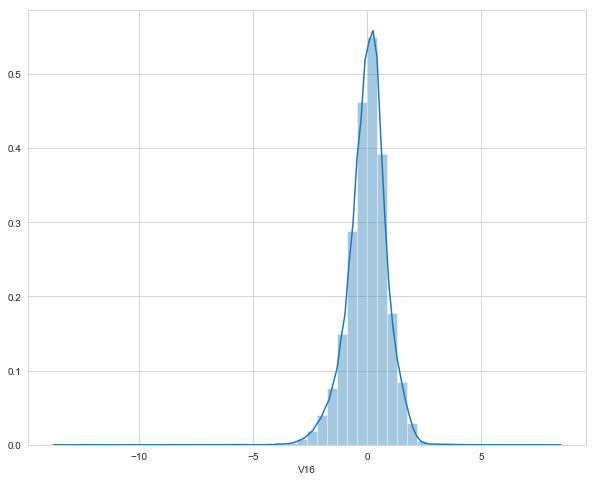

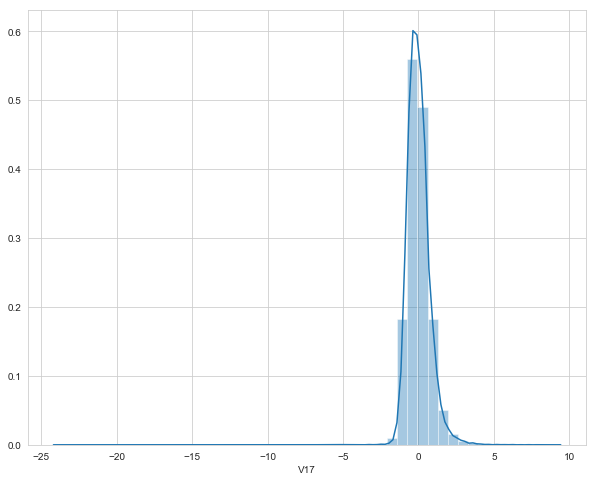

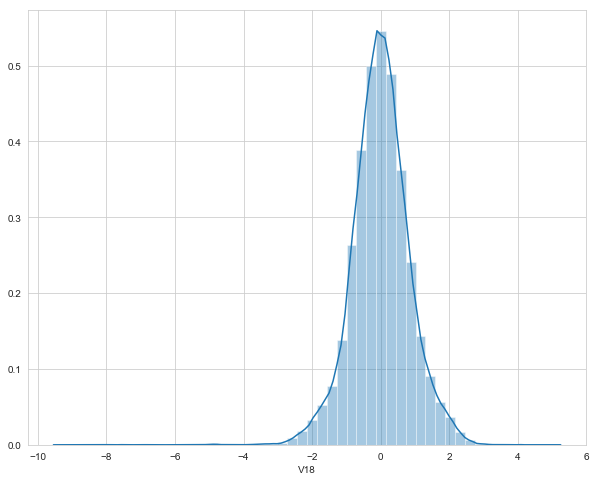

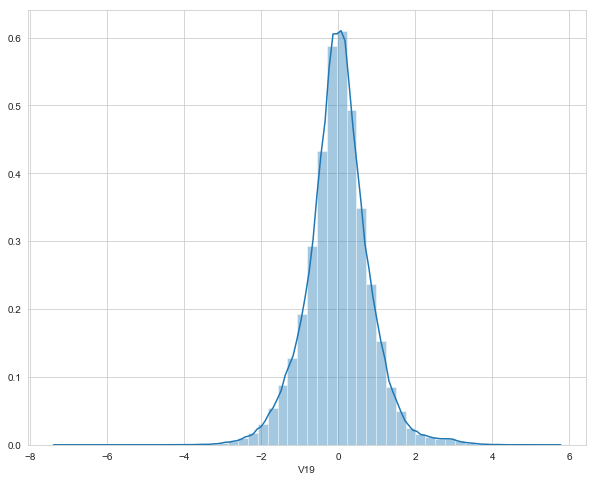

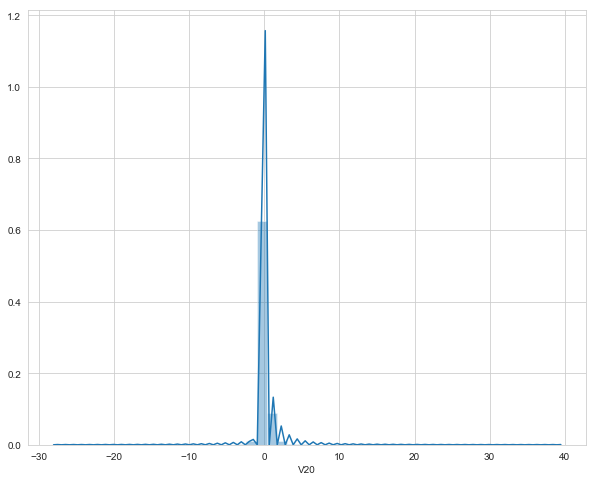

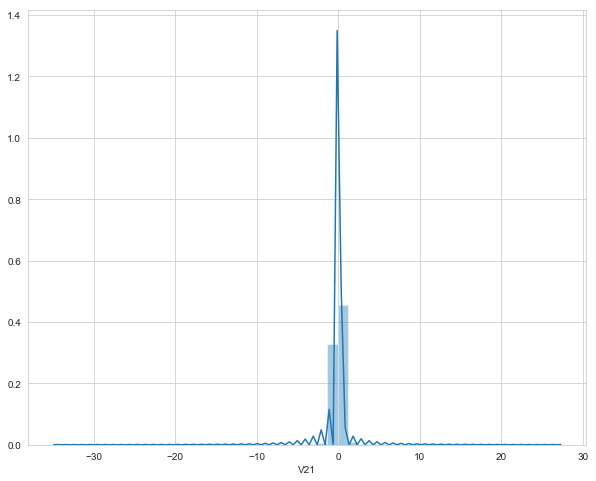

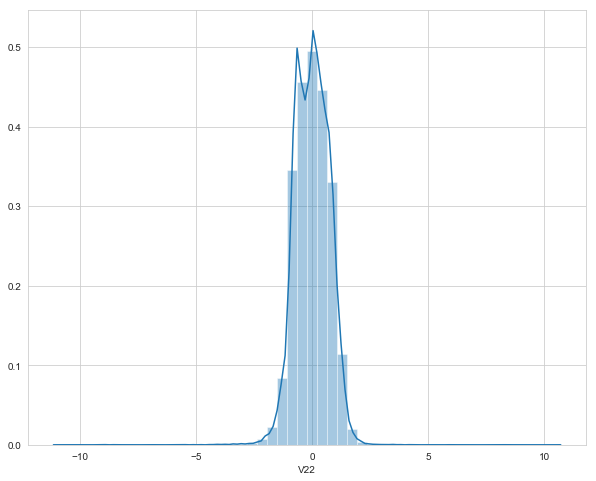

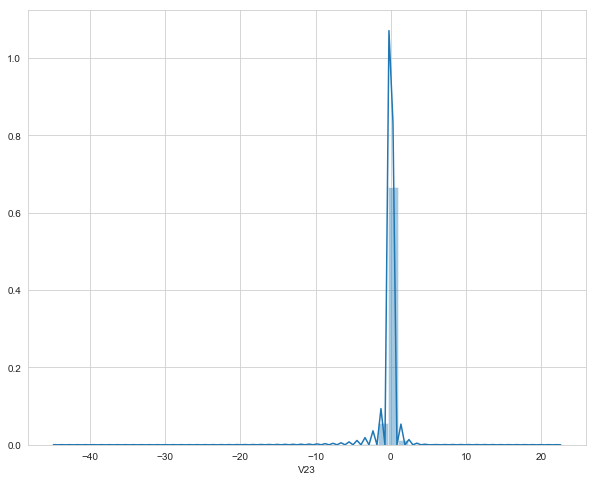

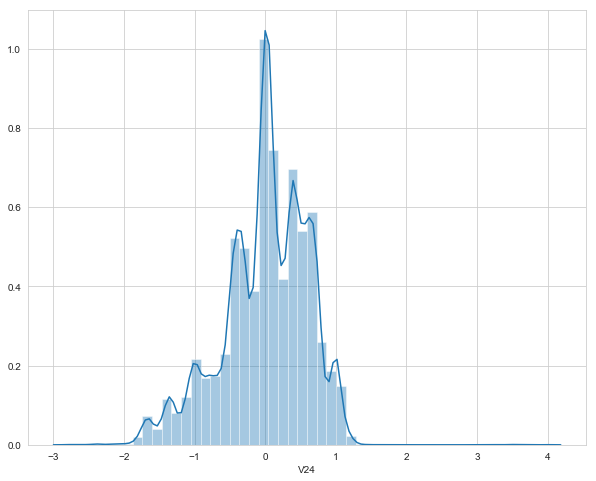

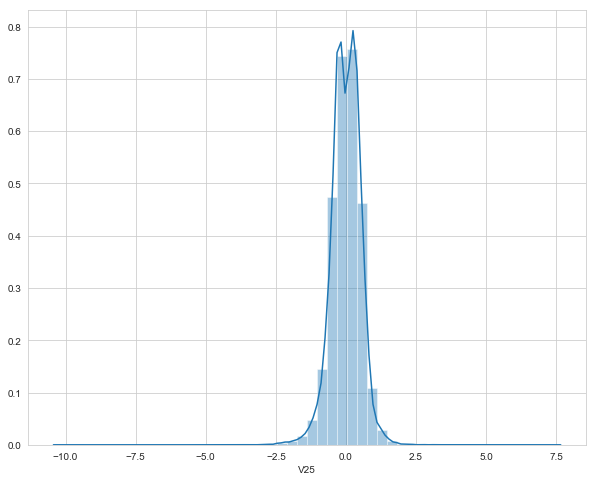

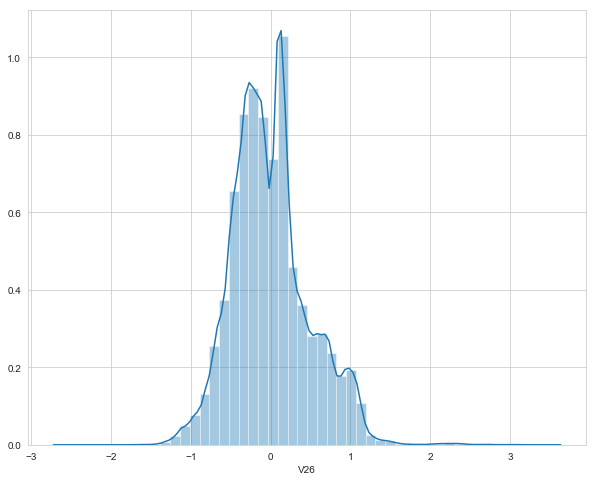

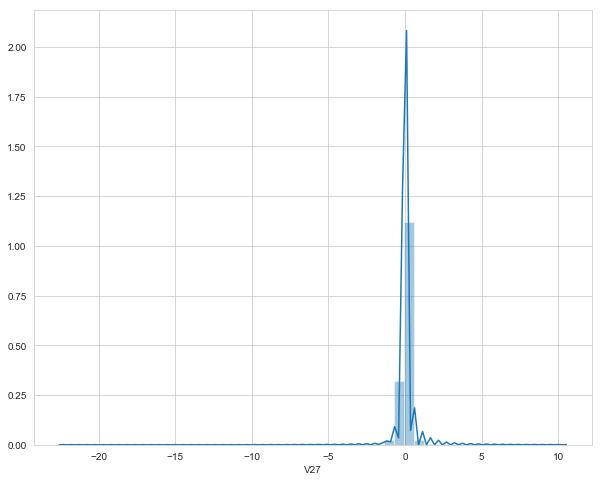

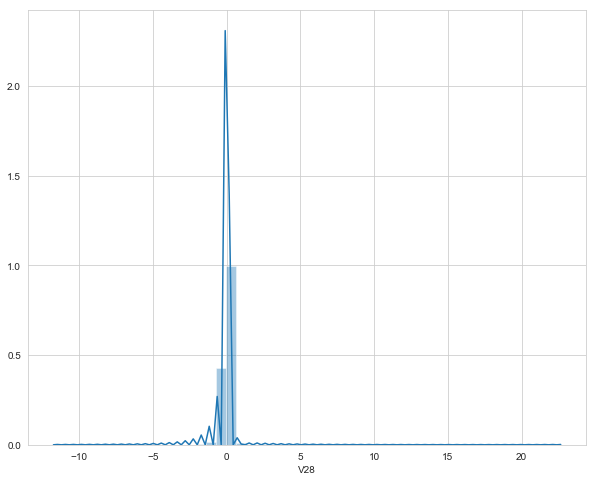

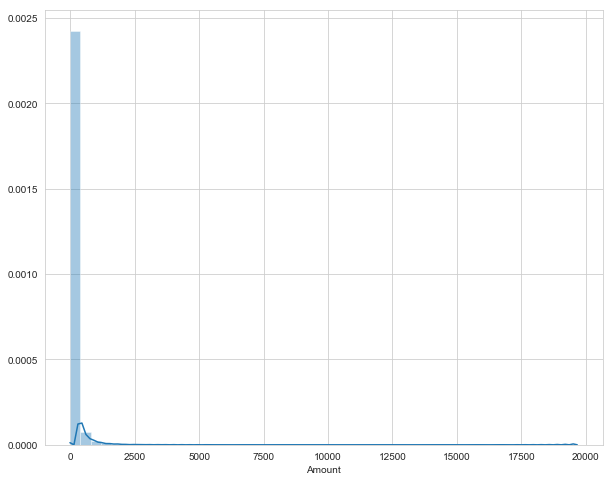

In [65]:
# We can see in the below graph that the data for V1 variable is highly skewed.
for col in X_train.columns:
    sns.distplot(X_train[col])
    plt.show()

### Correcting the Skewness in Data using Power Transformation

In [13]:
# Apply Power transformation to data in order to minimise skewness and to make data look more Gaussian-like
# We will be using Yeo-Johnson transform as it supports both positive and negative data whereas for Box-Cox the input data has to be strictly positive

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
col = X_train.columns
X_train_tsf=pd.DataFrame(pt.fit_transform(X_train),columns=col)
X_test_tsf=pd.DataFrame(pt.transform(X_test),columns=col)

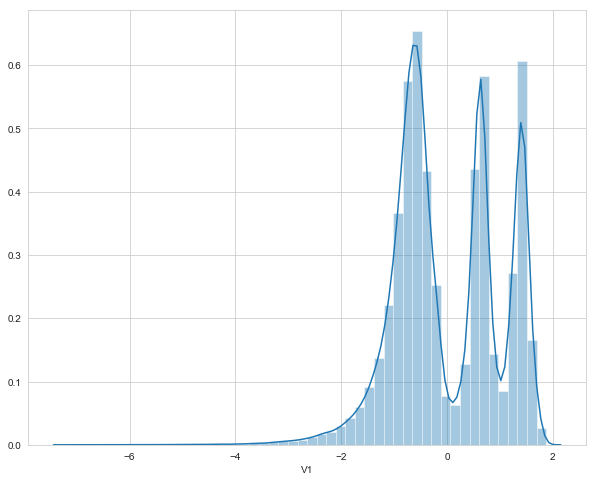

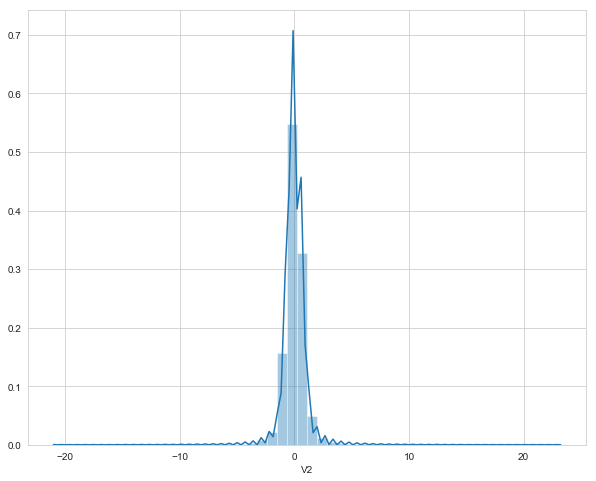

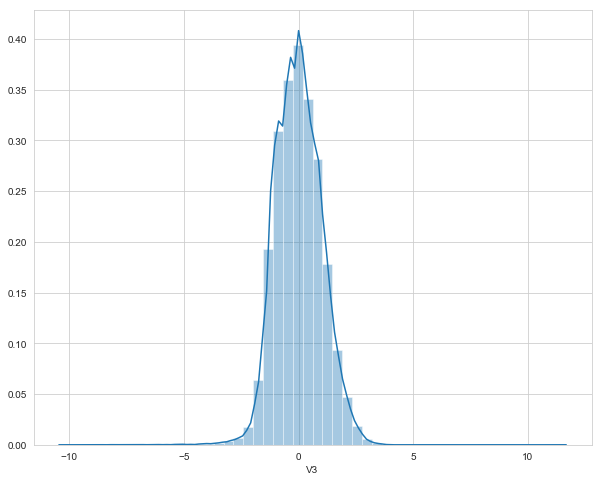

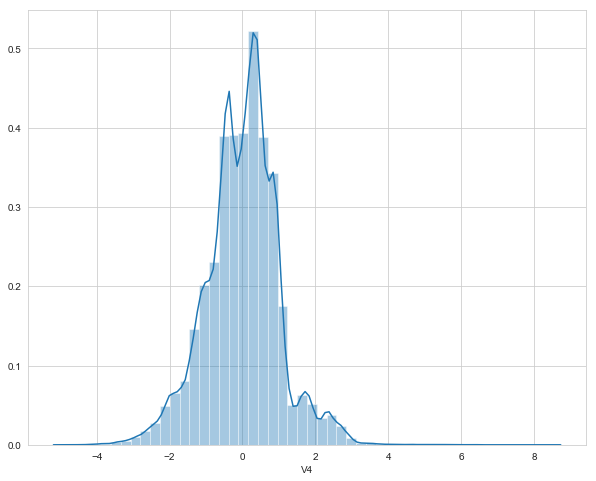

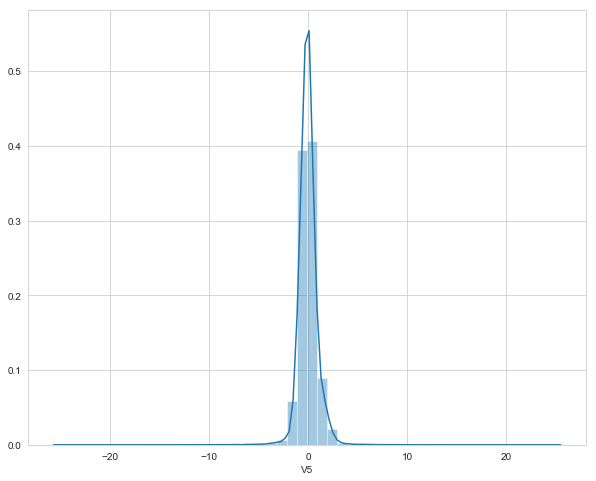

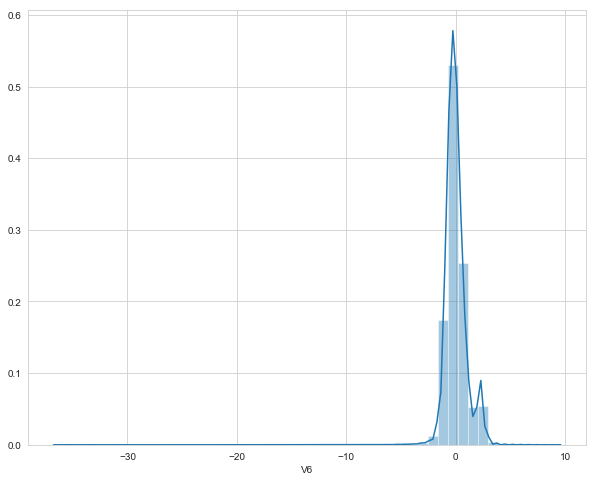

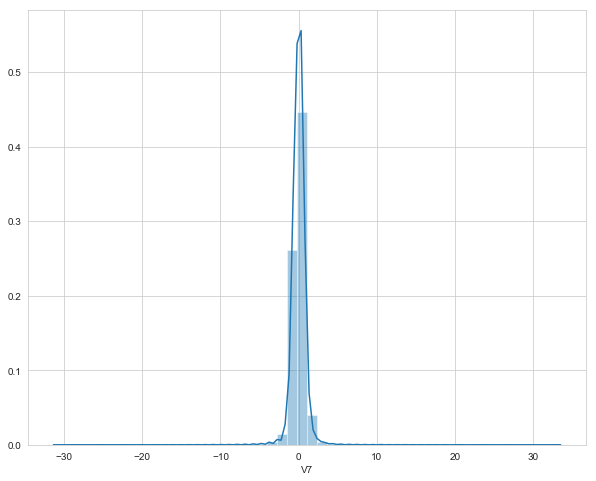

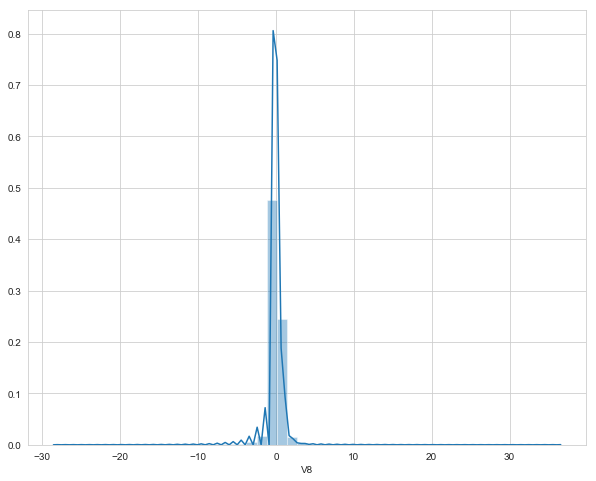

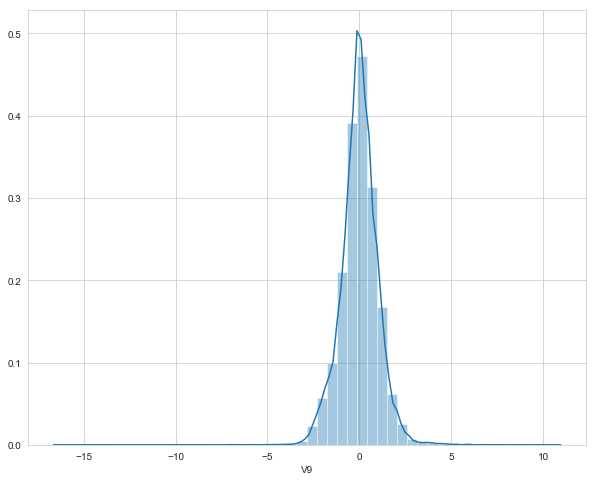

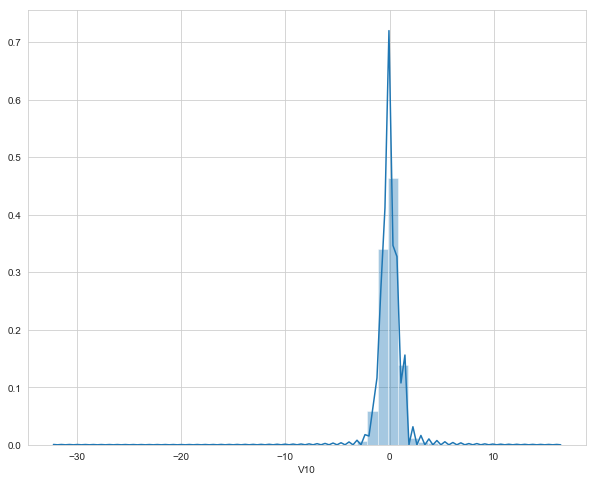

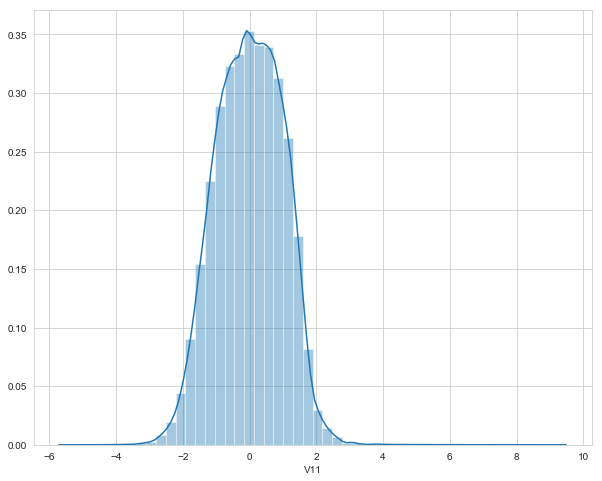

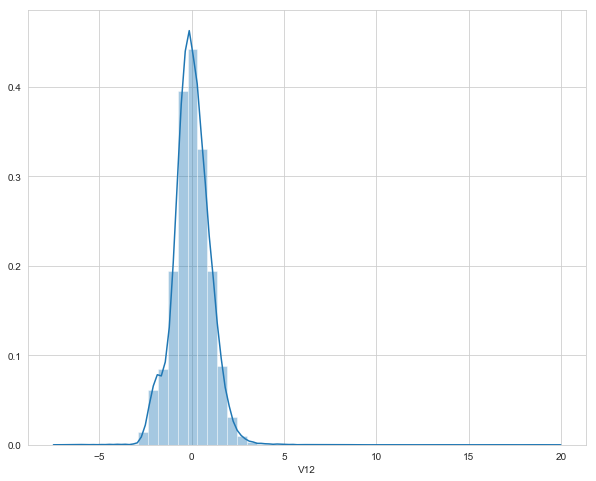

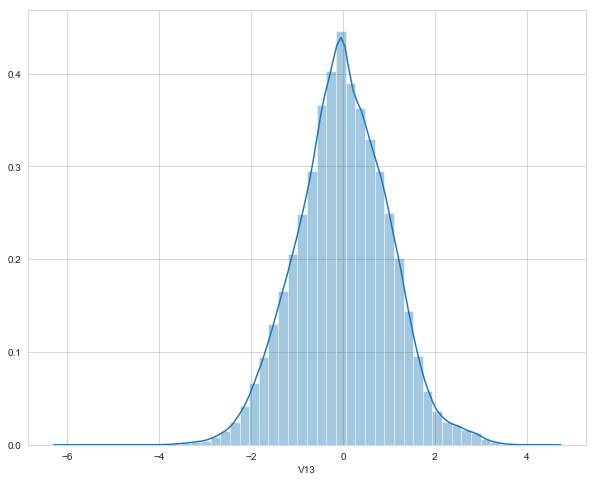

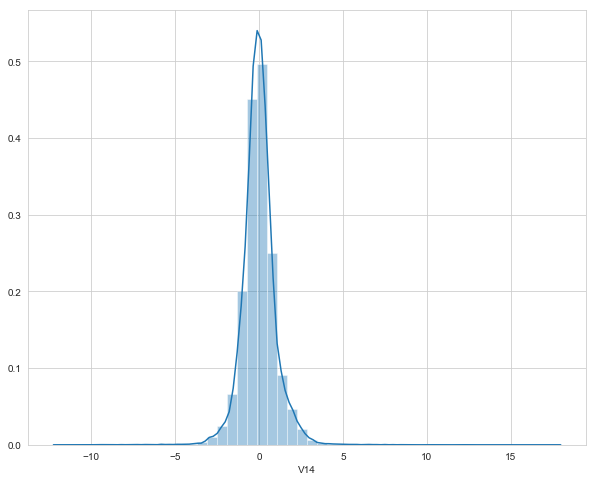

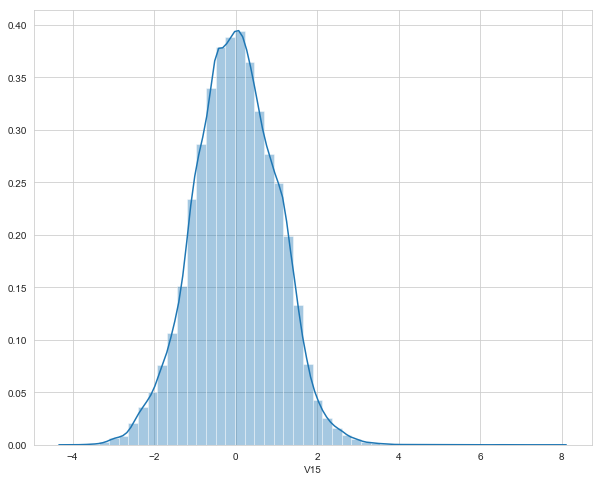

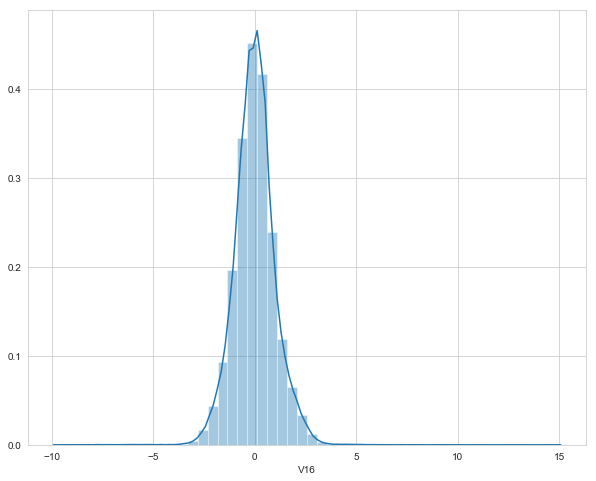

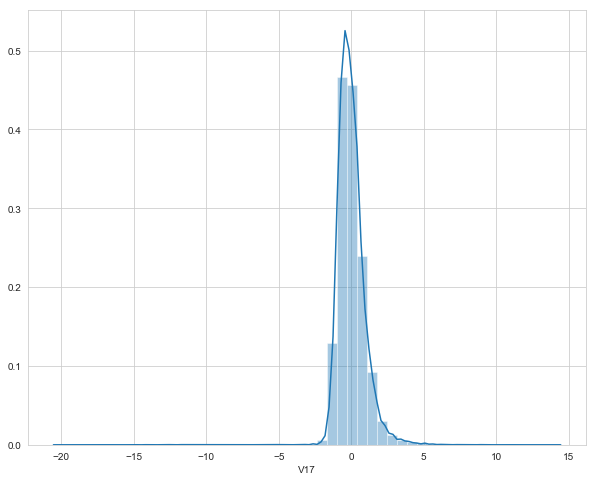

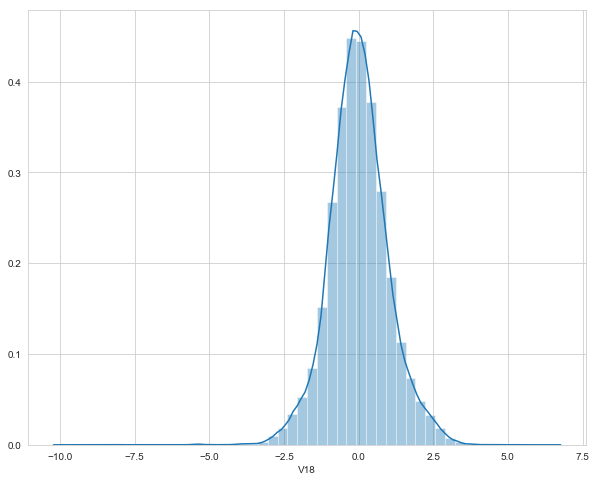

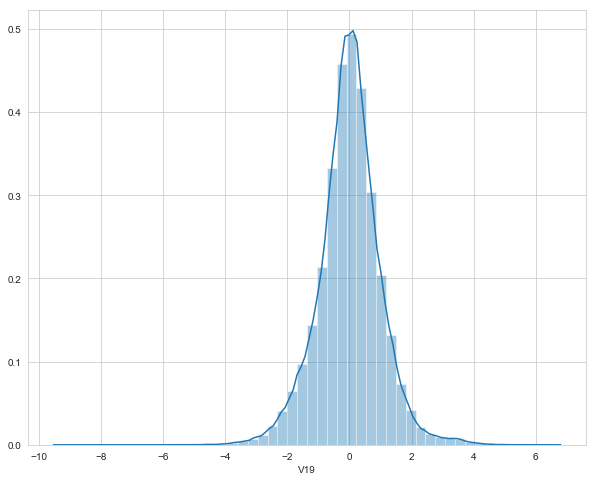

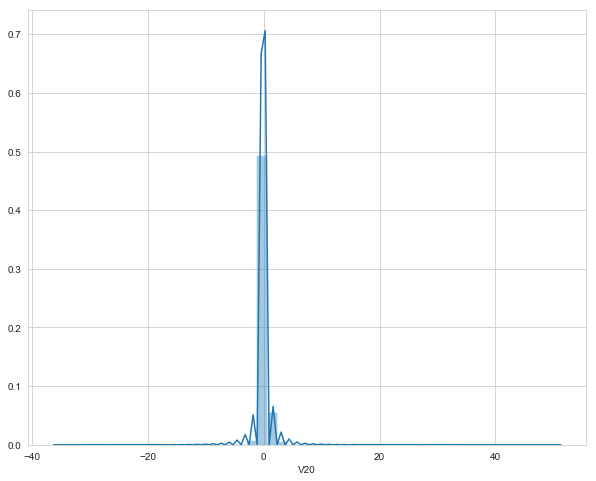

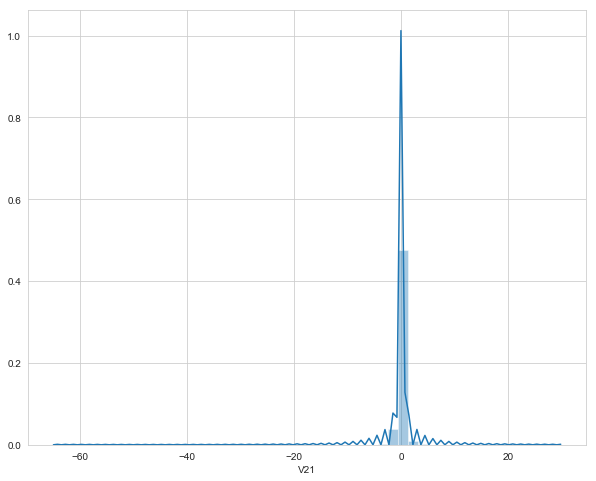

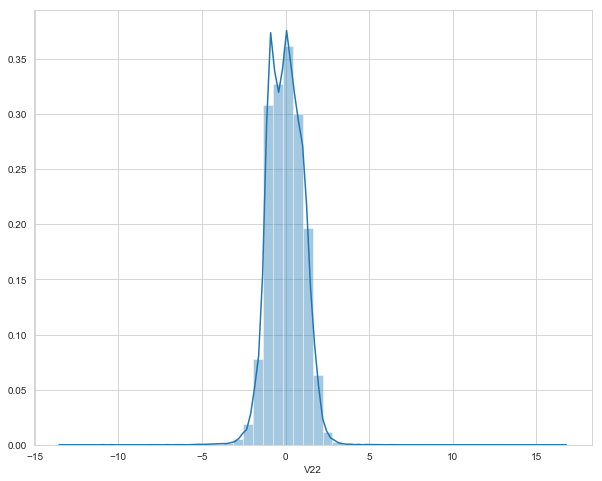

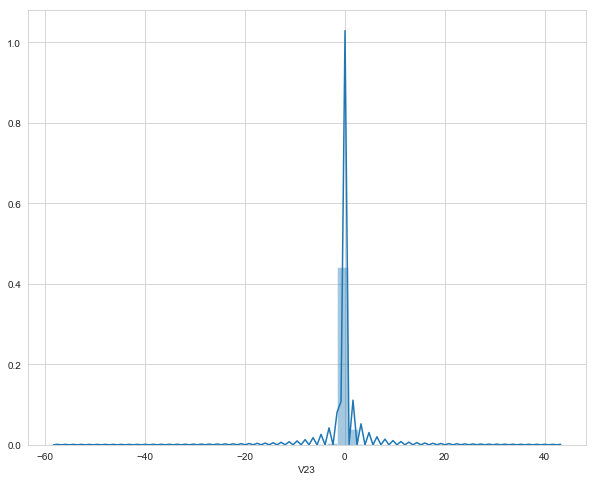

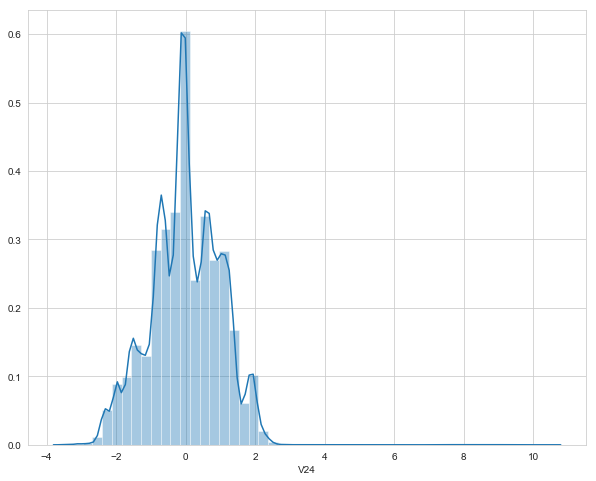

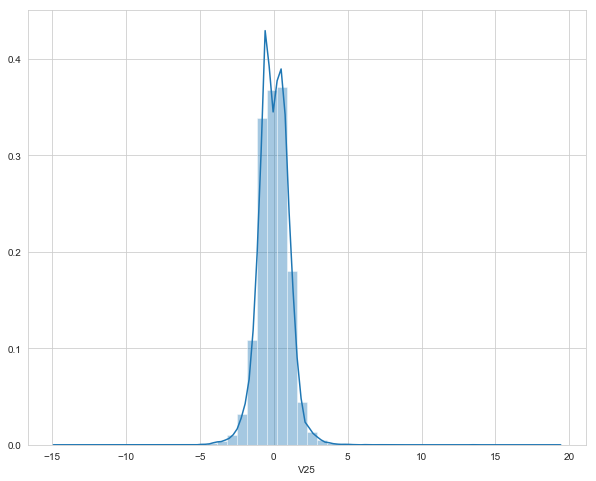

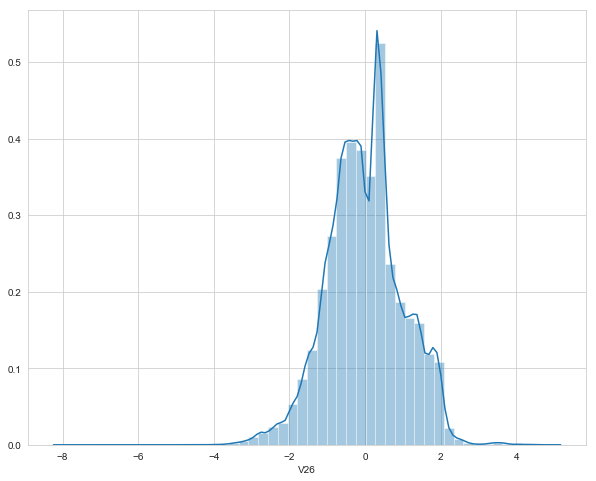

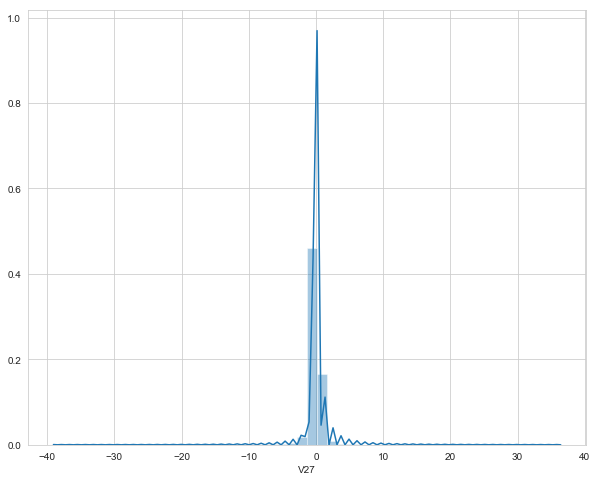

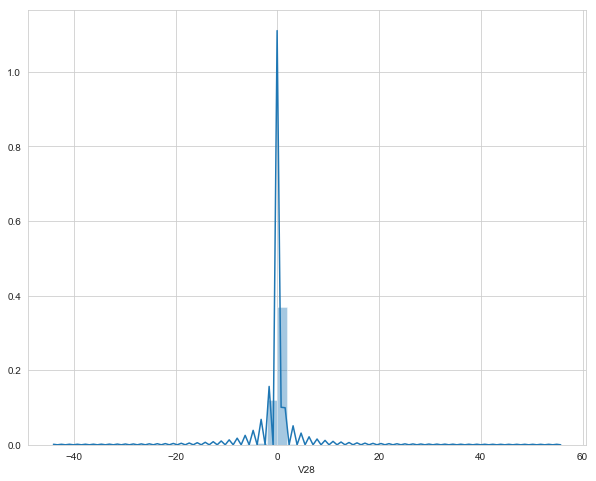

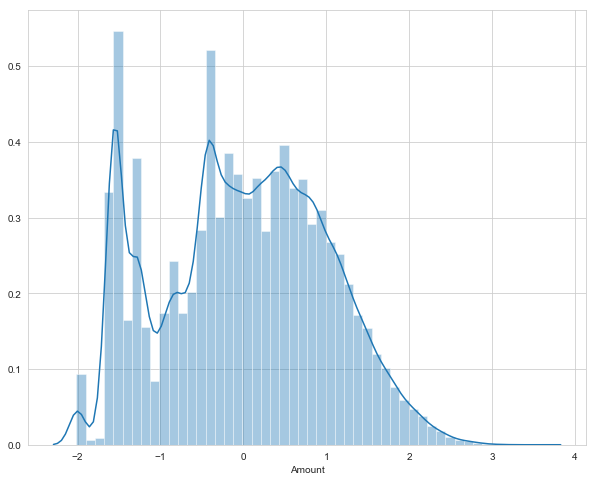

In [67]:
# Slight improvement in skewness after the power transformation

for i in pd.DataFrame(X_train_tsf).columns:
    sns.distplot(pd.DataFrame(X_train_tsf)[i])
    plt.show()

# DATA MODELLING - Scenario 1 - without treating Data Imbalance
## 1) Logistic Regression 2) Decision Tree Model 3) Random Forest 4) XG Boost

### While Logistic Regression is a traditional Classification Model, we are also exploring other more complex models which may have better predictive performance

### Selected evaluation metric for all our models is Area under the ROC curve [AUC]

### 1) Logistic Regression

In [42]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection

LogReg = LogisticRegression()
LogReg.fit(X_train_tsf,y_train)
y_train_pred=pd.DataFrame()

# predicting probability on train data
prob = pd.DataFrame(LogReg.predict_proba(X_train_tsf))[1]
y_train_pred["Prob"] = prob
y_train_pred.head()

,Prob
0,0.000030
1,0.000040
2,0.000316
3,0.000178
4,0.000081


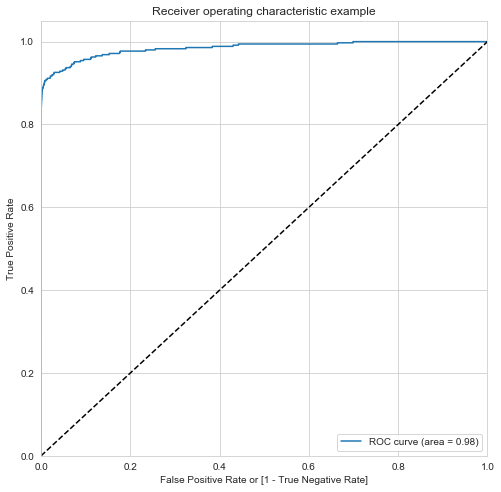

In [43]:
# Metric for evaluating all our models is Area under the ROC curve.

# Function to draw AUC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_train, prob)

# The optimal threshold based on the AUC graph is either 0.1 or 0.2.

In [45]:
# Finding Optimal Cutoff Point by using Youden's J statistic.
# Youden's J statistic is calculated as sensitivity + specificity - 1, which specifies the distance between ROC curve and
# the chance line. The optimal threshold is that which maximises J Statistic.

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred[i]= y_train_pred.Prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','J_Stats','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    J_Stats = sensi + speci - 1
    cutoff_df.loc[i] =[ i ,accuracy,J_Stats,sensi,speci]
print(cutoff_df)

# The optimal threshold is 0.1 as the sesitivity (recall) and specificity both are high and the J-Statistics is maximum.
# We are considering recall metric as it tells us the no. of fraudulent transactions that were identified correctly. 
# Also we can see accuracy score doesn't really tell us whether a model is good or not as all models have similar accuracy.
# This further explains why AUC (and not accuracy) is the right score to evaluate a model.

     prob  accuracy   J_Stats     sensi     speci
0.0   0.0  0.001756  0.000000  1.000000  0.000000
0.1   0.1  0.999373  0.831097  0.831429  0.999668
0.2   0.2  0.999388  0.791182  0.791429  0.999754
0.3   0.3  0.999433  0.771263  0.771429  0.999834
0.4   0.4  0.999393  0.742701  0.742857  0.999844
0.5   0.5  0.999343  0.699869  0.700000  0.999869
0.6   0.6  0.999288  0.659884  0.660000  0.999884
0.7   0.7  0.999238  0.619905  0.620000  0.999905
0.8   0.8  0.999162  0.577047  0.577143  0.999905
0.9   0.9  0.999097  0.539905  0.540000  0.999905


In [75]:
# AUC score for default model with selected threshold of 0.1

# Make predictions on Test data
y_test_pred = pd.DataFrame()
y_test_pred['lr_def_prob'] = pd.DataFrame(LogReg.predict_proba(X_test_tsf))[1]

# Classify transactions based on threshold value of 0.1
y_test_pred['lr_def_pred'] = y_test_pred.lr_def_prob.map(lambda x: 1 if x > 0.1 else 0)

print('AUC score for default Logistic Regression model is {:.4f}'.format(metrics.roc_auc_score( y_test, y_test_pred['lr_def_pred'])))

# The AUC score using logistic regression model without any hyperparameter tuning is 0.88

AUC score for default Logistic Regression model is 0.8870


In [76]:
# Cross Validation
# Use Stratified KFold to ensure the class distribution in each fold is a good representative of original dataset
# Using number of folds = 5 
folds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100) 

In [82]:
# Hyperparameter Tuning Using GridSearch Cross-Validation
# Optimising penalty hyperparameter

penalty = ['l1', 'l2']
param_grid = dict(penalty=penalty)
CV = model_selection.GridSearchCV(LogReg,param_grid=param_grid,scoring='roc_auc', cv=folds)
bestLogReg = CV.fit(X_train_tsf,y_train)
print(bestLogReg.best_estimator_.get_params())

# l2 is the selected penalty

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [94]:
# Hyperparameter Tuning Using Randomised Search Cross-Validation
# Using Randomised Search since the dataset is huge and sampling will be random and not uniform

penalty = ['l2'] # using l2 penalty
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
class_weight = [{1:0.6, 0:0.4}, {1:0.7, 0:0.3}, {1:0.95,0:0.05}]
solver = ['newton-cg', 'lbfgs', 'sag' , 'saga']

param_grid = dict(penalty=penalty,C=C,class_weight=class_weight, solver=solver)

CV = model_selection.RandomizedSearchCV(LogReg,param_distributions=param_grid,scoring='roc_auc', cv=folds, random_state=100)
bestLogReg = CV.fit(X_train_tsf,y_train)
print(bestLogReg.best_estimator_.get_params())

{'C': 1.0, 'class_weight': {1: 0.7, 0: 0.3}, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [95]:
# Using the tuned Logistic Regression model to predict on test data and view the AUC score
# Instantiate model with selected best hyperparameters
logreg_tuned = LogisticRegression(penalty='l2',C=1,class_weight={1:0.7,0:0.3},solver='saga')

# Fit the model on train data
logreg_tuned.fit(X_train_tsf,y_train)

# Predict on test data
y_test_pred['lr_tuned_prob'] = pd.DataFrame(logreg_tuned.predict_proba(X_test_tsf))[1]
# Classify transactions based on threshold value of 0.1
y_test_pred['lr_tuned_pred'] = y_test_pred.lr_tuned_prob.map(lambda x: 1 if x > 0.1 else 0)

auc_score = metrics.roc_auc_score( y_test, y_test_pred['lr_tuned_pred'])
auc_score

# The AUC score for tuned model for the test data is 0.901 and for untuned model its 0.887. 

0.9010684781364947

In [241]:
#The recall for tuned Logistic regression model is 80%.
print(classification_report(y_test, y_test_pred['lr_tuned_pred']))

# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred['dt_pred']))

# The tuned logistic regression is able to predict 107 out of total 142 fraudulent transactions.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.66      0.80      0.73       142

    accuracy                           1.00     85443
   macro avg       0.83      0.90      0.86     85443
weighted avg       1.00      1.00      1.00     85443

[[85263    38]
 [   35   107]]


### 2) Decision Tree Model

In [96]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth 5
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_tsf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [97]:
# Evaluating default decision tree model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_test_pred['dt_prob'] = pd.DataFrame(dt_default.predict_proba(X_test_tsf))[1]
# Classify transactions based on threshold value of 0.1
y_test_pred['dt_pred'] = y_test_pred.dt_prob.map(lambda x: 1 if x > 0.1 else 0)

# metrics: AUC
print("AUC score {:.4f}".format(metrics.roc_auc_score(y_test, y_test_pred['dt_pred'])))

# Printing classification report
print(classification_report(y_test, y_test_pred['dt_pred']))

#AUC score for default decision tree model is 0.876
# The recall is 0.7, this means model able to predict 75% of fraudulent transactions.

AUC score 0.8765
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.74      0.75      0.75       142

    accuracy                           1.00     85443
   macro avg       0.87      0.88      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [98]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred['dt_pred']))

# We can see here that the model predicted 107 cases out of 142 fraudulent cases.

[[85263    38]
 [   35   107]]


In [99]:
# Hyperparameter Tuning

In [104]:
# Running GridsearchCV oto find optimal max_depth parameter

# parameters to build the model on
param_grid = {'max_depth': range(1, 40,5)}

# instantiate the model
dtree = DecisionTreeClassifier()

# fit tree on training data with scoring parameter as AUC 
tree = model_selection.GridSearchCV(dtree,param_grid, 
                    cv=folds, 
                   scoring="roc_auc")
tree.fit(X_train_tsf, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40, 5)},
             pre_dispa

In [107]:
# Viewing the result and best parameter
pd.DataFrame(tree.cv_results_)

# The score is highest at depth 6 and 31. Will consider max depth around 6.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.724662,0.016464,0.012974,0.000637,1,{'max_depth': 1},0.842631,0.842732,0.849824,0.835589,0.892681,0.852691,0.020495,6
1,3.945046,0.035890,0.012977,0.000018,6,{'max_depth': 6},0.867117,0.919708,0.870011,0.854409,0.883943,0.879038,0.022398,2
2,7.161048,0.107354,0.013562,0.000503,11,{'max_depth': 11},0.864812,0.859423,0.839282,0.829245,0.820396,0.842632,0.017080,8
3,19.263725,5.288152,0.029298,0.007614,16,{'max_depth': 16},0.877057,0.894952,0.810196,0.825762,0.832114,0.848016,0.032326,7
4,24.176000,2.007584,0.032324,0.000785,21,{'max_depth': 21},0.878270,0.892656,0.878358,0.835493,0.893223,0.875600,0.021094,3
5,24.276328,2.062841,0.032127,0.001335,26,{'max_depth': 26},0.878295,0.892644,0.856904,0.864097,0.885316,0.875451,0.013220,5
6,24.416615,2.067195,0.031636,0.000611,31,{'max_depth': 31},0.892593,0.892644,0.878333,0.856929,0.892543,0.882608,0.013977,1
7,24.241842,2.304340,0.028495,0.006768,36,{'max_depth': 36},0.899749,0.892644,0.864047,0.849774,0.871140,0.875471,0.018406,4


In [108]:
# Running GridsearchCV to find optimal min_samples_leaf parameter

# parameters to build the model on
param_grid = {'min_samples_leaf': range(5, 500,50)}

# instantiate the model
dtree = DecisionTreeClassifier()

# fit tree on training data with scoring parameter as AUC 
tree = model_selection.GridSearchCV(dtree,param_grid, 
                    cv=folds, 
                   scoring="roc_auc")
tree.fit(X_train_tsf, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 500, 50)},


In [109]:
# Viewing the result and best parameter
pd.DataFrame(tree.cv_results_)

# The optimal value range for min_Samples_leaf must be between 300 to 400 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,21.296746,1.379569,0.032198,0.001363,5,{'min_samples_leaf': 5},0.892638,0.906996,0.914054,0.878340,0.921181,0.902642,0.015385,10
1,21.815158,1.594625,0.028439,0.006537,55,{'min_samples_leaf': 55},0.941827,0.949325,0.913337,0.927500,0.942057,0.934809,0.012861,9
2,21.992614,1.103098,0.031744,0.000754,105,{'min_samples_leaf': 105},0.948658,0.955873,0.919778,0.955649,0.948675,0.945726,0.013357,6
3,18.596787,1.236470,0.031509,0.000804,155,{'min_samples_leaf': 155},0.940949,0.955579,0.919524,0.948223,0.948327,0.942520,0.012394,8
4,18.159803,1.822554,0.031402,0.001333,205,{'min_samples_leaf': 205},0.940943,0.948055,0.933013,0.955181,0.948076,0.945054,0.007518,7
5,18.039099,1.991108,0.031551,0.000473,255,{'min_samples_leaf': 255},0.947757,0.954510,0.932898,0.955035,0.947800,0.947600,0.007991,4
6,17.113370,1.855626,0.030760,0.000421,305,{'min_samples_leaf': 305},0.947257,0.954321,0.939369,0.954532,0.961346,0.951365,0.007472,1
7,17.197095,1.884262,0.031136,0.000390,355,{'min_samples_leaf': 355},0.946825,0.947220,0.923762,0.968869,0.967626,0.950860,0.016549,2
8,17.902318,2.061962,0.030939,0.000615,405,{'min_samples_leaf': 405},0.953453,0.953670,0.937834,0.946139,0.959665,0.950152,0.007505,3
9,17.380076,1.741826,0.031405,0.000912,455,{'min_samples_leaf': 455},0.953112,0.945845,0.923163,0.945492,0.966507,0.946824,0.014068,5


In [110]:
# Running GridsearchCV to find optimal min_samples_leaf parameter

# parameters to build the model on
param_grid = {'min_samples_split': range(5, 500,50)}

# instantiate the model
dtree = DecisionTreeClassifier()

# fit tree on training data with scoring parameter as AUC 
tree = model_selection.GridSearchCV(dtree,param_grid, 
                    cv=folds, 
                   scoring="roc_auc")
tree.fit(X_train_tsf, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 500, 50)},

In [111]:
# Viewing the result and best parameter
pd.DataFrame(tree.cv_results_)

# The optimal value range for min_Samples_split must be between 300 to 400 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,23.540552,2.952039,0.033918,0.002090,5,{'min_samples_split': 5},0.899711,0.885492,0.871202,0.835510,0.899719,0.878327,0.023876,10
1,24.263522,2.025050,0.032265,0.001329,55,{'min_samples_split': 55},0.928083,0.928276,0.921064,0.899618,0.942394,0.923887,0.013974,9
2,24.379532,2.109767,0.032338,0.001005,105,{'min_samples_split': 105},0.935082,0.928194,0.921006,0.913647,0.942373,0.928060,0.010116,8
3,24.437871,2.088258,0.032937,0.000612,155,{'min_samples_split': 155},0.949134,0.935144,0.920738,0.934788,0.942323,0.936425,0.009452,7
4,24.513772,2.064208,0.032508,0.000777,205,{'min_samples_split': 205},0.949052,0.942040,0.920547,0.941866,0.941928,0.939087,0.009670,5
5,24.392710,2.099911,0.032554,0.001357,255,{'min_samples_split': 255},0.949031,0.941882,0.920279,0.941742,0.941751,0.938937,0.009741,6
6,24.419929,2.044104,0.030937,0.002107,305,{'min_samples_split': 305},0.948951,0.955950,0.920261,0.941595,0.941679,0.941687,0.011961,1
7,24.316274,2.119804,0.032533,0.001007,355,{'min_samples_split': 355},0.948838,0.956003,0.920122,0.941367,0.941555,0.941577,0.012010,2
8,24.376442,2.097236,0.032743,0.001165,405,{'min_samples_split': 405},0.948730,0.956003,0.920122,0.941367,0.941370,0.941519,0.011997,3
9,23.059889,2.279172,0.032638,0.002198,455,{'min_samples_split': 455},0.948730,0.956003,0.919925,0.941367,0.941325,0.941470,0.012068,4


In [112]:
# We can now use RandomizedSearchCV to find multiple optimal hyperparameters together
param_grid = {
    'max_depth': [4,5,6],
    'min_samples_leaf': range(300, 400, 50),
    'min_samples_split': range(300, 400, 50),
    'criterion': ["entropy", "gini"]
}


# instantiate the model
dtree = DecisionTreeClassifier()

# fit tree on training data with scoring parameter as AUC 
tree = model_selection.RandomizedSearchCV(dtree,param_grid, 
                    cv=n_folds, 
                   scoring="roc_auc",random_state=100)
tree.fit(X_train_tsf, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_sta

In [121]:
scores = pd.DataFrame(tree.cv_results_)
scores[scores['rank_test_score']==1]
# Tuned hyperparameters are - Max depth 6, min_samples_split 350, min_samples_leaf 300, criterion entropy
# with mean roc_auc score 0.965414 on train data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,12.418388,0.556266,0.030341,0.000472,350,300,6,entropy,"{'min_samples_split': 350, 'min_samples_leaf':...",0.942318,0.96588,0.97832,0.972929,0.967625,0.965414,0.012342,1


In [122]:
# Fitting the decision tree with tuned hyperparameters
dt_tuned = DecisionTreeClassifier(max_depth=6,min_samples_split=350, 
                                    min_samples_leaf=300, criterion='entropy',random_state = 100)

dt_tuned.fit(X_train_tsf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=300, min_samples_split=350,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [123]:
# Making predictions
y_test_pred['dt_tuned_prob'] = pd.DataFrame(dt_tuned.predict_proba(X_test_tsf))[1]
y_test_pred['dt_tuned_pred'] = y_test_pred.dt_tuned_prob.map(lambda x: 1 if x > 0.1 else 0)

# metrics: AUC
print(metrics.roc_auc_score(y_test, y_test_pred['dt_tuned_pred']))

# Printing classification report
print(classification_report(y_test, y_test_pred['dt_tuned_pred']))

# The recall for tuned decision tree model is 82% whereas for default decision tree model was 75%
# Also the AUC for tuned model is 0.910 which is better than the default model with 0.876
# Hence improvement in the tuned model over default model.

0.9109929444546907
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.41      0.82      0.55       142

    accuracy                           1.00     85443
   macro avg       0.71      0.91      0.77     85443
weighted avg       1.00      1.00      1.00     85443



In [124]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred['dt_tuned_pred']))

# We can see here that the tuned decision tree model predicted 117 cases out of 142 fraudulent cases.
# Whereas the default model predicted only 107 cases out of 142 fraudulent cases.

[[85134   167]
 [   25   117]]


### 3) Random Forest

In [125]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(random_state=100)

# fit
rfc.fit(X_train_tsf,y_train)

# Making predictions on Test data
y_test_pred['rf_def_prob'] = pd.DataFrame(rfc.predict_proba(X_test_tsf))[1]
y_test_pred['rf_def_pred'] = y_test_pred.rf_def_prob.map(lambda x: 1 if x > 0.1 else 0)

# metrics: AUC
print(metrics.roc_auc_score(y_test, y_test_pred['rf_def_pred']))

# Printing classification report
print(classification_report(y_test,y_test_pred['rf_def_pred']))

# The recall for default random forest model is 82% 
# Also the AUC for default random forest model is 0.908 
# Hence improvement in the tuned model over default model.

0.9081224548496121
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.67      0.82      0.74       142

    accuracy                           1.00     85443
   macro avg       0.84      0.91      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [126]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred['rf_def_pred']))
# We can see here that the model predicted 116 cases out of 142 fraudulent cases.

[[85245    56]
 [   26   116]]


In [70]:
# Hyperparameter Tuning for Random Forest

In [177]:
# Running GridSearch Cross Validation to find optimal range of max_depth
# specify number of folds for k-fold CV
n_folds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(1,30,5)
}
# Create a model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_cv = model_selection.GridSearchCV(rf, param_grid, scoring='roc_auc',
                          cv = n_folds,verbose = 1)
rf_cv.fit(X_train_tsf, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
          

In [178]:
# Print optimal value of max_depth with best auc score
print('Best auc of',rf_cv.best_score_,'using',rf_cv.best_params_)
pd.DataFrame(rf_cv.cv_results_)
# Hence we will pass range around 9 while tuning all hyperparameters together

Best auc of 0.9747741724121258 using {'max_depth': 11}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.962439,0.023662,0.025527,0.000800,1,{'max_depth': 1},0.920332,0.906979,0.885339,0.885456,0.921132,0.903847,0.015882,6
1,4.759625,0.252521,0.038306,0.004020,6,{'max_depth': 6},0.963329,0.967222,0.935575,0.971393,0.976288,0.962761,0.014260,3
2,8.339705,0.254023,0.043289,0.004111,11,{'max_depth': 11},0.968973,0.973917,0.969495,0.983539,0.977947,0.974774,0.005461,1
3,10.706589,0.581970,0.049269,0.005014,16,{'max_depth': 16},0.957755,0.976677,0.943591,0.990959,0.964863,0.966769,0.016158,2
4,10.774811,0.153433,0.046877,0.001092,21,{'max_depth': 21},0.941949,0.934174,0.926242,0.934828,0.920620,0.931563,0.007395,5
5,10.996316,0.512873,0.051075,0.005400,26,{'max_depth': 26},0.928232,0.942614,0.913917,0.935313,0.949638,0.933943,0.012305,4


In [157]:
# Running GridSearch Cross Validation to find optimal range of min_samples_leaf

# specify number of folds for k-fold CV
n_folds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_leaf': range(100, 600, 200)
}
# Create a model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_cv = model_selection.GridSearchCV(rf, param_grid, scoring='roc_auc',
                          cv = n_folds,verbose = 1)
rf_cv.fit(X_train_tsf, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
          

In [158]:
# Print optimal value of min_samples_leaf with best auc score
print('Best auc of',rf_cv.best_score_,'using',rf_cv.best_params_)
pd.DataFrame(rf_cv.cv_results_)
# Hence we will pass range around 500 while tuning all hyperparameters together

Best auc of 0.9695466149393329 using {'min_samples_leaf': 500}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.355982,0.546839,0.046295,0.004459,100,{'min_samples_leaf': 100},0.951095,0.970854,0.969548,0.971693,0.970789,0.966796,0.007880,3
1,7.893694,0.332849,0.041509,0.001348,300,{'min_samples_leaf': 300},0.951870,0.963831,0.968468,0.983676,0.970206,0.967610,0.010273,2
2,7.250015,0.264032,0.040718,0.000970,500,{'min_samples_leaf': 500},0.953609,0.967671,0.965649,0.976712,0.984093,0.969547,0.010350,1


In [159]:
# Running GridSearch Cross Validation to find optimal range of min_samples_split
# specify number of folds for k-fold CV
n_folds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_split': range(200, 800, 200)
}
# Create a model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_cv = model_selection.GridSearchCV(rf, param_grid, scoring='roc_auc',
                          cv = n_folds,verbose = 1)
rf_cv.fit(X_train_tsf, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
          

In [160]:
# Print optimal value of min_samples_split with best auc score
print('Best auc of',rf_cv.best_score_,'using',rf_cv.best_params_)
pd.DataFrame(rf_cv.cv_results_)
# Hence we will pass range around 400 while tuning all hyperparameters together

Best auc of 0.9623200233851966 using {'min_samples_split': 400}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.003541,0.504250,0.046668,0.001465,200,{'min_samples_split': 200},0.952849,0.966666,0.943636,0.943442,0.952462,0.951811,0.008474,3
1,10.159439,0.598852,0.046275,0.001955,400,{'min_samples_split': 400},0.950135,0.977689,0.939627,0.986885,0.957264,0.962320,0.017485,1
2,10.628190,0.828599,0.046282,0.001618,600,{'min_samples_split': 600},0.955324,0.970550,0.959869,0.970891,0.951724,0.961672,0.007827,2


In [180]:
# Running GridSearch Cross Validation to find optimal range of max_features
# specify number of folds for k-fold CV
n_folds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_features': range(10,30,5)
}
# Create a model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_cv = model_selection.GridSearchCV(rf, param_grid, scoring='roc_auc',
                          cv = n_folds,verbose = 1, n_jobs=-1)
rf_cv.fit(X_train_tsf, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
          

In [181]:
# Print optimal value of max_features with best auc score
print('Best auc of',rf_cv.best_score_,'using',rf_cv.best_params_)
pd.DataFrame(rf_cv.cv_results_)
# Hence we will pass range around 20 while tuning all hyperparameters together

Best auc of 0.9311401280120346 using {'max_features': 20}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,48.263993,1.878566,0.114094,0.018418,10,{'max_features': 10},0.928287,0.935484,0.906820,0.942493,0.942589,0.931135,0.013255,2
1,67.886340,9.129698,0.086370,0.012078,15,{'max_features': 15},0.935420,0.942571,0.913996,0.928286,0.935379,0.931130,0.009685,3
2,97.610093,6.050881,0.087173,0.018050,20,{'max_features': 20},0.942571,0.928316,0.921141,0.928195,0.935478,0.931140,0.007295,1
3,78.696048,16.080320,0.048485,0.003180,25,{'max_features': 25},0.928300,0.928314,0.913993,0.899638,0.949759,0.924001,0.016699,4


#### Running RandomizedSearch Cross Validation to find optimal set of hyperparameters together.
#### We will be passing a range of values for each hyperparameter based on individual GridSearch CV run's results.

In [164]:
# Finding optimal set of hyperparameters

# specify number of folds for k-fold CV
n_folds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_leaf': range(450, 550, 50),
    'min_samples_split': range(400, 500, 50),
    'max_depth': [7,9],
    'n_estimators': range(50,150,50)
}
# Create a model
rf = RandomForestClassifier()
# Instantiate the randomized search model
rf_cv = model_selection.RandomizedSearchCV(rf, param_grid, scoring='roc_auc',
                          cv = n_folds,verbose = 1, random_state=100, n_jobs=-1)
rf_cv.fit(X_train_tsf, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 10.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_...
                                                    n_jobs=None,
         

In [165]:
# Print optimal set of hyperparameters with best auc score
print('Best auc of',rf_cv.best_score_,'using',rf_cv.best_params_)
pd.DataFrame(rf_cv.cv_results_)

Best auc of 0.9745329116017922 using {'n_estimators': 50, 'min_samples_split': 400, 'min_samples_leaf': 450, 'max_depth': 9}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,57.129693,1.556954,0.246542,0.018122,50,400,500,7,"{'n_estimators': 50, 'min_samples_split': 400,...",0.962881,0.977904,0.962927,0.976662,0.978448,0.971765,0.007258,8
1,54.673060,4.112228,0.229588,0.012762,50,450,500,7,"{'n_estimators': 50, 'min_samples_split': 450,...",0.957294,0.967697,0.962880,0.983475,0.981509,0.970571,0.010294,9
2,62.881322,0.780474,0.252924,0.006753,50,400,500,9,"{'n_estimators': 50, 'min_samples_split': 400,...",0.963630,0.978331,0.962959,0.985835,0.976683,0.973487,0.008879,4
3,65.023794,1.135912,0.273669,0.022651,50,450,500,9,"{'n_estimators': 50, 'min_samples_split': 450,...",0.959048,0.965633,0.961157,0.983184,0.983721,0.970549,0.010750,10
4,134.083400,3.039890,0.493482,0.018886,100,400,450,9,"{'n_estimators': 100, 'min_samples_split': 400...",0.956173,0.975141,0.970234,0.986104,0.978900,0.973310,0.010014,5
5,159.054854,4.937161,0.670811,0.070423,150,450,450,7,"{'n_estimators': 150, 'min_samples_split': 450...",0.964084,0.974405,0.968339,0.985492,0.977014,0.973867,0.007370,2
6,64.754515,1.945960,0.293416,0.083584,50,400,450,9,"{'n_estimators': 50, 'min_samples_split': 400,...",0.961041,0.972558,0.973447,0.984036,0.981583,0.974533,0.008089,1
7,128.513089,1.787455,0.475929,0.021590,100,450,500,9,"{'n_estimators': 100, 'min_samples_split': 450...",0.959028,0.973634,0.970791,0.985625,0.978952,0.973606,0.008871,3
8,152.348381,2.451843,0.555515,0.128602,150,450,500,7,"{'n_estimators': 150, 'min_samples_split': 450...",0.958391,0.973812,0.965873,0.983822,0.980666,0.972513,0.009376,7
9,94.378735,12.135726,0.327320,0.113388,100,450,450,7,"{'n_estimators': 100, 'min_samples_split': 450...",0.958662,0.975212,0.966618,0.987045,0.977978,0.973103,0.009728,6


In [189]:
# Fitting with tuned hyperparameters
rf_tuned = RandomForestClassifier(bootstrap=True,min_samples_split= 400,
 min_samples_leaf= 450,n_estimators=50,
 max_depth= 11,random_state = 100)

rf_tuned.fit(X_train_tsf, y_train)

# Making predictions
y_test_pred['rf_tuned_prob'] = pd.DataFrame(rf_tuned.predict_proba(X_test_tsf))[1]
y_test_pred['rf_tuned_pred'] = y_test_pred.rf_tuned_prob.map(lambda x: 1 if x > 0.1 else 0)

# metrics: AUC
print(metrics.roc_auc_score(y_test, y_test_pred['rf_tuned_pred']))

# Printing classification report
print(classification_report(y_test,y_test_pred['rf_tuned_pred']))

# The recall for tuned random forest model is 82% which is same as default random forest model
# the AUC score for tuned random forest model is 0.9069 whereas for default it was 0.908

0.9069677204385266
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.31      0.82      0.45       142

    accuracy                           1.00     85443
   macro avg       0.66      0.91      0.73     85443
weighted avg       1.00      1.00      1.00     85443



In [190]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred['rf_tuned_pred']))

# We can see here that the Tuned Random Forest model predicted 116 cases out of 142 fraudulent cases.
# And the default Random Forest model predicted 116 cases out of 142 fraudulent cases as well.

# The no. of false positives is much higher in tuned model[253] as compared to default model[56].
# Hence default model for random forest is much better than tuned model.

[[85048   253]
 [   26   116]]


### 4) XG Boost

In [192]:
# Importing required library
from xgboost import XGBClassifier

# fit model on training data with default hyperparameters
xgb = XGBClassifier()
# fit the model on train data 
xgb.fit(X_train_tsf, y_train)

# Make predictions on test data
# use predict_proba since we need probabilities to compute auc
y_test_pred['xgb_def_prob'] = pd.DataFrame(xgb.predict_proba(X_test_tsf))[1]
y_test_pred['xgb_def_pred'] = y_test_pred.xgb_def_prob.map(lambda x: 1 if x > 0.1 else 0)

# AUC SCORE
score = metrics.roc_auc_score(y_test, y_test_pred['xgb_def_pred'])
print(score)

# Printing classification report
print(classification_report(y_test,y_test_pred['xgb_def_pred']))


# AUC score is 0.908 for XGBoost model with default hyperparameters. 
# The recall for default model is 82%

0.9082103787895425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.74      0.82      0.78       142

    accuracy                           1.00     85443
   macro avg       0.87      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [193]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred['xgb_def_pred']))
# We can see here that the model predicted 116 cases out of 142 fraudulent cases.
# It predicted only 41 as fraud but were actually valid transactions

[[85260    41]
 [   26   116]]


In [194]:
# Run GridsearchCV to tune n_estimators hyperparameter

# specify number of folds for k-fold CV
n_folds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# Create the parameter grid based on the results of random search 
param_grid = {
     'n_estimators': range(100,1000,300)
}
# Instantiate a model 
xgb = XGBClassifier()
# Instantiate the grid search model
xgb_1_cv = model_selection.GridSearchCV(xgb, param_grid, scoring='roc_auc',
                          cv = n_folds,verbose = 1, n_jobs=-1)

# fit the model on train data 
xgb_1_cv.fit(X_train_tsf, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 14.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': range(100, 1000, 300)},
             pre_dispatch='2*n_jo

In [195]:
# Print optimal n_estimators with best auc score
print('Best auc of',xgb_1_cv.best_score_,'using',xgb_1_cv.best_params_)
pd.DataFrame(xgb_1_cv.cv_results_)

# Hence the optimal range for n_estimators is around 100

Best auc of 0.9823568406743949 using {'n_estimators': 100}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,123.822430,0.725517,0.261701,0.038350,100,{'n_estimators': 100},0.974117,0.978942,0.986919,0.987023,0.984783,0.982357,0.005060,1
1,475.103590,11.597643,0.764557,0.078628,400,{'n_estimators': 400},0.967432,0.980873,0.983687,0.986077,0.984594,0.980533,0.006766,2
2,546.460483,117.794077,0.872655,0.083055,700,{'n_estimators': 700},0.965768,0.982530,0.980490,0.988365,0.983201,0.980071,0.007608,3


In [196]:
# Run GridsearchCV to tune learning_Rate hyperparameter

# specify number of folds for k-fold CV
n_folds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# Create the parameter grid based on the results of random search 
param_grid = {
     'learning_rate': [0.01,0.1,1]
}
# Instantiate a model 
xgb = XGBClassifier()
# Instantiate the grid search model
xgb_2_cv = model_selection.GridSearchCV(xgb, param_grid, scoring='roc_auc',
                          cv = n_folds,verbose = 1, n_jobs=-1)

# fit the model on train data 
xgb_2_cv.fit(X_train_tsf, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', r

In [197]:
# Print optimal learning_rate with best auc score
print('Best auc of',xgb_2_cv.best_score_,'using',xgb_2_cv.best_params_)
pd.DataFrame(xgb_2_cv.cv_results_)

# Hence the optimal value for learning_rate is between 0.1 and 1

Best auc of 0.9823568406743949 using {'learning_rate': 0.1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,123.988388,5.476968,0.226595,0.040331,0.01,{'learning_rate': 0.01},0.921214,0.935546,0.906957,0.899853,0.935552,0.919824,0.014566,3
1,124.293412,14.877973,0.185307,0.050195,0.1,{'learning_rate': 0.1},0.974117,0.978942,0.986919,0.987023,0.984783,0.982357,0.005060,1
2,94.593474,3.381349,0.187098,0.042731,1,{'learning_rate': 1},0.961317,0.977634,0.985419,0.983569,0.982687,0.978125,0.008791,2


In [198]:
# Run GridsearchCV to tune max_depth hyperparameter

# specify number of folds for k-fold CV
n_folds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# Create the parameter grid based on the results of random search 
param_grid = {
     'max_depth': range(10,30,5)
}
# Instantiate a model 
xgb = XGBClassifier()
# Instantiate the grid search model
xgb_3_cv = model_selection.GridSearchCV(xgb, param_grid, scoring='roc_auc',
                          cv = n_folds,verbose = 1, n_jobs=-1)

# fit the model on train data 
xgb_3_cv.fit(X_train_tsf, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 13.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1, param_grid={'max_depth': range(10, 30, 5)},
             pre_dispatch='2*n_jobs', refit=True, retu

In [199]:
# Print optimal max_depth with best auc score
print('Best auc of',xgb_3_cv.best_score_,'using',xgb_3_cv.best_params_)
pd.DataFrame(xgb_3_cv.cv_results_)

# The best auc score is for max_depth 10. The auc score is same for depth - 15,20,25

Best auc of 0.9800813726072392 using {'max_depth': 10}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,335.047528,9.006629,0.397937,0.018117,10,{'max_depth': 10},0.967487,0.980825,0.983663,0.987016,0.981416,0.980081,0.006661,1
1,346.586276,11.953659,0.396739,0.030704,15,{'max_depth': 15},0.971716,0.974595,0.975829,0.981176,0.983772,0.977418,0.004416,2
2,344.552197,7.860962,0.358643,0.058120,20,{'max_depth': 20},0.971716,0.974595,0.975829,0.981176,0.983772,0.977418,0.004416,2
3,180.628342,83.568112,0.186704,0.056084,25,{'max_depth': 25},0.971716,0.974595,0.975829,0.981176,0.983772,0.977418,0.004416,2


In [200]:
# Hyperparameter Tuning with XGBoost
# specify number of folds for k-fold CV
n_folds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# Create the parameter grid based on the results of random search 
param_grid = {
     'learning_rate': [0.1,0.5,0.7],
     'subsample': [0.3, 0.6, 0.9], 
    'n_estimators': [50,100,150],
    'max_depth': [10,15]
}
# Instantiate a model 
xgb = XGBClassifier()

# Instantiate the randomized search model
xgb_cv = model_selection.RandomizedSearchCV(xgb, param_grid, scoring='roc_auc',
                          cv = n_folds,verbose = 1, random_state=100, n_jobs=-1)
xgb_cv.fit(X_train_tsf, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 22.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=Non...
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
    

In [201]:
# Print optimal set of hyperparameters with best auc score
print('Best auc of',xgb_cv.best_score_,'using',xgb_cv.best_params_)
pd.DataFrame(xgb_cv.cv_results_)

Best auc of 0.9814304521741687 using {'subsample': 0.3, 'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,129.920732,1.876829,0.272672,0.021497,0.6,50,15,0.5,"{'subsample': 0.6, 'n_estimators': 50, 'max_de...",0.965390,0.960023,0.979997,0.985186,0.986093,0.975338,0.010657,5
1,200.415679,3.921060,0.506249,0.099302,0.6,100,15,0.5,"{'subsample': 0.6, 'n_estimators': 100, 'max_d...",0.965541,0.961296,0.978025,0.989337,0.989266,0.976693,0.011672,4
2,234.190874,7.631740,0.636100,0.021319,0.9,100,15,0.5,"{'subsample': 0.9, 'n_estimators': 100, 'max_d...",0.961748,0.972751,0.978142,0.991481,0.979569,0.976738,0.009674,3
3,184.491196,7.312585,0.328198,0.026022,0.9,50,15,0.1,"{'subsample': 0.9, 'n_estimators': 50, 'max_de...",0.951437,0.963767,0.968889,0.981443,0.971345,0.967376,0.009829,10
4,199.456241,6.099797,0.571474,0.028621,0.6,100,10,0.7,"{'subsample': 0.6, 'n_estimators': 100, 'max_d...",0.948252,0.983496,0.970236,0.973114,0.968646,0.968749,0.011479,8
5,145.862352,2.240573,0.432644,0.082077,0.9,50,15,0.7,"{'subsample': 0.9, 'n_estimators': 50, 'max_de...",0.963042,0.980891,0.971898,0.983418,0.971070,0.974064,0.007338,7
6,122.249472,6.483074,0.270752,0.051597,0.3,50,10,0.1,"{'subsample': 0.3, 'n_estimators': 50, 'max_de...",0.963293,0.969809,0.972638,0.965446,0.970855,0.968408,0.003486,9
7,317.724822,3.481802,0.723266,0.041671,0.3,150,10,0.1,"{'subsample': 0.3, 'n_estimators': 150, 'max_d...",0.964794,0.981700,0.981089,0.993017,0.986551,0.981430,0.009353,1
8,314.856214,22.073851,0.717480,0.150552,0.9,150,10,0.5,"{'subsample': 0.9, 'n_estimators': 150, 'max_d...",0.962088,0.985533,0.979083,0.989181,0.973885,0.977954,0.009519,2
9,239.294614,18.433661,0.554123,0.063071,0.9,150,15,0.7,"{'subsample': 0.9, 'n_estimators': 150, 'max_d...",0.963623,0.977671,0.975132,0.985311,0.974951,0.975338,0.006962,6


In [202]:
# Fitting with tuned hyperparameters
xgb_tuned =XGBClassifier(learning_rate = 0.1,
                         subsample= 0.3, n_estimators = 150, max_depth = 10,random_state = 100)

xgb_tuned.fit(X_train_tsf, y_train)

# Making predictions
y_test_pred['xgb_tuned_prob'] = pd.DataFrame(xgb_tuned.predict_proba(X_test_tsf))[1]
y_test_pred['xgb_tuned_pred'] = y_test_pred.xgb_tuned_prob.map(lambda x: 1 if x > 0.1 else 0)

# metrics: AUC
print(metrics.roc_auc_score(y_test, y_test_pred['xgb_tuned_pred']))

# Printing classification report
print(classification_report(y_test,y_test_pred['xgb_tuned_pred']))

# The recall for tuned XGBoost model is 82% which is same as default XGBoost model
# the AUC score for tuned XGBoost model is 0.90829 whereas for default it was 0.90821

0.9082924411334775
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.81      0.82      0.81       142

    accuracy                           1.00     85443
   macro avg       0.91      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [203]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred['xgb_tuned_pred']))

# We can see here that the Tuned XGBoost model predicted 116 cases out of 142 fraudulent cases.
# And the default XGBoost model predicted 116 cases out of 142 fraudulent cases as well.

# However, the no. of false positives is much higher in default model[41] as compared to tuned model[27].
# Hence XGBoost tuned model is much better than XGBoost default model as the number of false positives are less in Tuned model.

[[85274    27]
 [   26   116]]


### We can see XGBoost and Random Forest model both results in AUC score of around 0.908.
### However XGBoost model is best as it has much lesser false positives cases (only 27) when compared with Random Forest model.

# DATA MODELLING - Scenario 2 - Treating Data Imbalance
## We have selected to run SMOTE and ADASYN oversampling method to balance the data and run all below mentioned models on balanced data.
### 1) Logistic Regression 2) Decision Tree 3) Random Forest 4) XG Boost
#### We have tuned the most optimal model for each data balancing method and have concluded by recommending the best model among both oversampling methods.

### Treating Data Imbalance - SMOTE

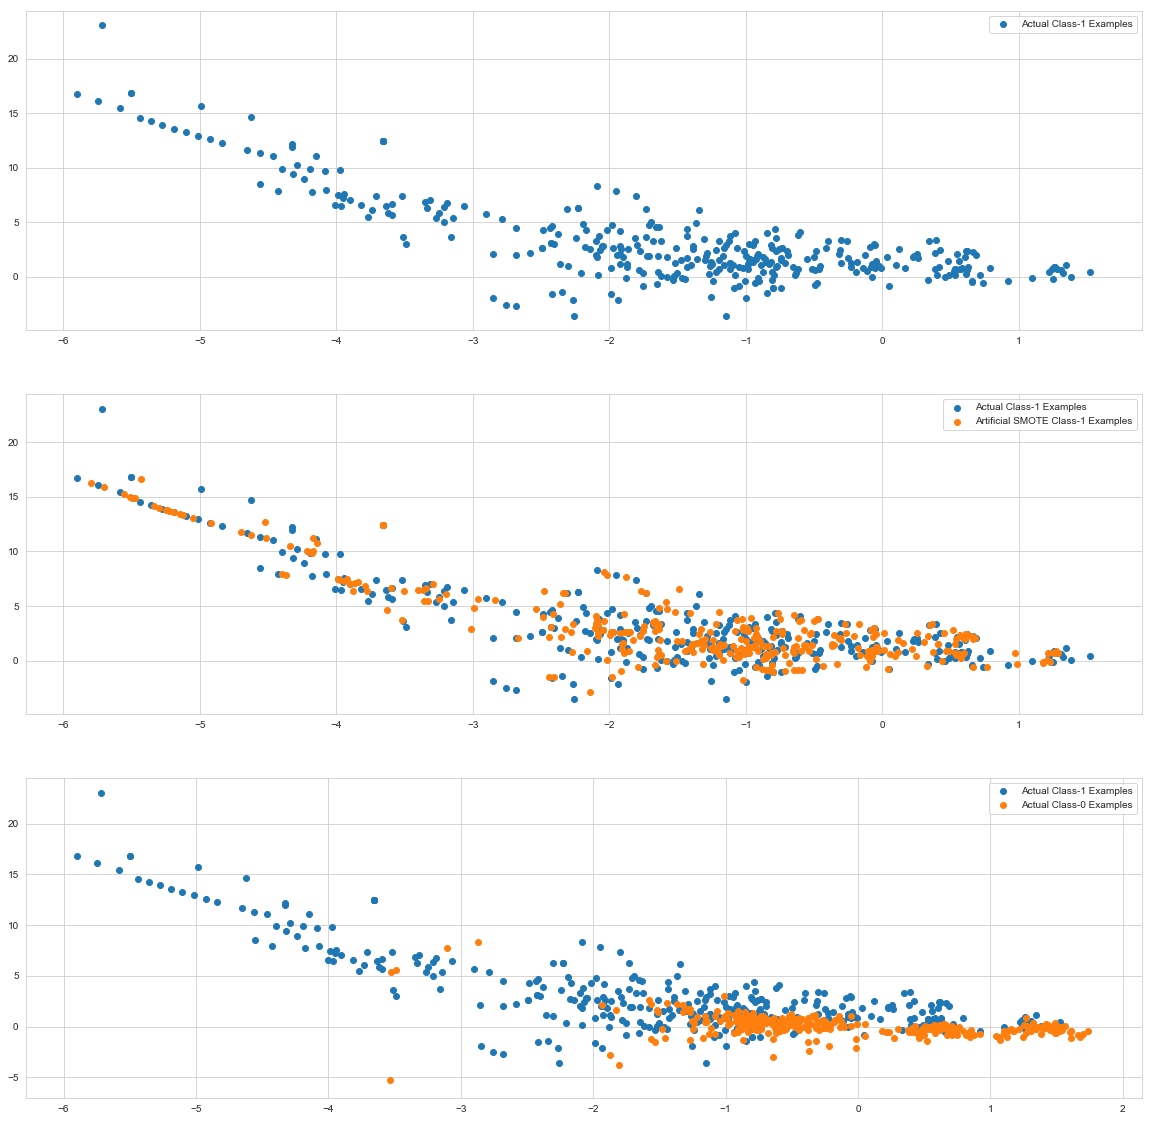

In [16]:
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling

# Apply SMOTE for treating class imbalance
sm = over_sampling.SMOTE(random_state=0)
# Fit and apply the transform
X_train_smote, y_train_smote = sm.fit_resample(X_train_tsf, y_train)

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train_tsf.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_tsf.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [17]:
# Convert arrays into dataframes

print('After SMOTE OverSampling, the shape of X_train: {}'.format(X_train_smote.shape))
print('After SMOTE OverSampling, the shape of y_train: {}'.format(y_train_smote.shape))

print("After SMOTE OverSampling, no. of Fraud records : {}".format(sum(y_train_smote==1)))
print("After SMOTE OverSampling, no. of Valid records : {}".format(sum(y_train_smote==0)))

# As we can see, both the number of fraud and valid records are same after running SMOTE oversampling

After SMOTE OverSampling, the shape of X_train: (398028, 29)
After SMOTE OverSampling, the shape of y_train: (398028,)
After SMOTE OverSampling, no. of Fraud records : 199014
After SMOTE OverSampling, no. of Valid records : 199014


In [236]:
# Logistic Regression Model on balanced data

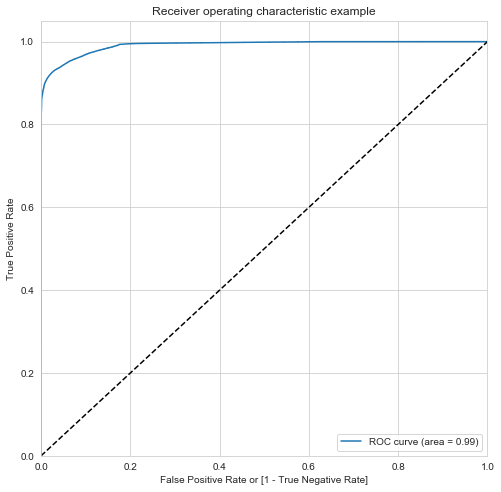

     prob   j_stats     sensi     speci
0.0   0.0  0.000000  1.000000  0.000000
0.1   0.1  0.817807  0.993287  0.824520
0.2   0.2  0.876074  0.962686  0.913388
0.3   0.3  0.892364  0.945999  0.946366
0.4   0.4  0.898540  0.934015  0.964525
0.5   0.5  0.900967  0.925563  0.975404
0.6   0.6  0.899288  0.916604  0.982685
0.7   0.7  0.895540  0.907650  0.987890
0.8   0.8  0.890731  0.898957  0.991774
0.9   0.9  0.879757  0.884802  0.994955


In [260]:
# Running Logistic regression and predicting on Train data 
LogReg = LogisticRegression()
LogReg.fit(X_train_smote,y_train_smote)
y_train_pred=pd.DataFrame()

# predicting probability on train data
prob = pd.DataFrame(LogReg.predict_proba(X_train_smote))[1]
y_train_pred_sm =pd.DataFrame()
y_train_pred_sm["Prob"] = prob
# Draw ROC AUC curve
draw_roc(y_train_smote,prob)

# Finding Optimal Cutoff Point by using Youden's J statistic.
# Youden's J statistic is calculated as sensitivity + specificity - 1, which specifies the distance between ROC curve and
# the chance line. The optimal threshold is that which maximises J Statistic.

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_sm[i]= y_train_pred_sm.Prob.map(lambda x: 1 if x > i else 0)
cutoff_df = pd.DataFrame( columns = ['prob','j_stats','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_smote, y_train_pred_sm[i] )
    total1=sum(sum(cm1))
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    j_stats = speci + sensi - 1
    cutoff_df.loc[i] =[ i ,j_stats,sensi,speci]
print(cutoff_df)


# The optimal threshold is 0.5 as the sesitivity (recall) & specificity both are high hence the J statistic is highest.

In [261]:
# Make predictions on Test data
y_test_pred_sm = pd.DataFrame()
y_test_pred_sm['lr_def_prob'] = pd.DataFrame(LogReg.predict_proba(X_test_tsf))[1]

# Classify transactions based on threshold value of 0.1
y_test_pred_sm['lr_def_pred'] = y_test_pred_sm.lr_def_prob.map(lambda x: 1 if x > 0.5 else 0)

print('AUC score for default Logistic Regression model is {:.4f}'.format(metrics.roc_auc_score( y_test, y_test_pred_sm['lr_def_pred'])))

AUC score for default Logistic Regression model is 0.9345


In [262]:
# The recall for default Logistic regression model is 89%.
print(classification_report(y_test, y_test_pred_sm['lr_def_pred']))

# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred_sm['lr_def_pred']))

# The default logistic regression is able to predict 127 out of total 142 fraudulent transactions.
# Hence the recall is high but a huge number of valid transactions 2172 are classified as fraud.
# Hence the model is not optimal.

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85301
           1       0.06      0.89      0.10       142

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.97      0.99     85443

[[83129  2172]
 [   15   127]]


In [258]:
# Decision Tree Model on balanced data

In [263]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train_smote, y_train_smote)

# Evaluating default decision tree model

# Making predictions
y_test_pred_sm['dt_prob'] = pd.DataFrame(dt_default.predict_proba(X_test_tsf))[1]
# Classify transactions based on threshold value of 0.1
y_test_pred_sm['dt_pred'] = y_test_pred_sm.dt_prob.map(lambda x: 1 if x > 0.5 else 0)

# metrics: AUC
print("AUC score {:.4f}".format(metrics.roc_auc_score(y_test, y_test_pred_sm['dt_pred'])))

# Printing classification report
print(classification_report(y_test, y_test_pred_sm['dt_pred']))

# AUC score for default decision tree model is 0.8757
# The recall is 0.75, this means model able to predict 75% of fraudulent transactions.

AUC score 0.8757
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.37      0.75      0.50       142

    accuracy                           1.00     85443
   macro avg       0.69      0.88      0.75     85443
weighted avg       1.00      1.00      1.00     85443



In [264]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred_sm['dt_pred']))

# The model is able to predict 107 out of total 142 fraudulent cases.
# The model predicted 181 valid transactions as fraud. 
# This model is better than the logistic regression model. 

[[85120   181]
 [   35   107]]


In [ ]:
# Random Forest on balanced data

In [265]:
# Run Random Forest using balanced data
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(random_state=100)

# fit
rfc.fit(X_train_smote,y_train_smote)

# Making predictions on Test data
y_test_pred_sm['rf_def_prob'] = pd.DataFrame(rfc.predict_proba(X_test_tsf))[1]
y_test_pred_sm['rf_def_pred'] = y_test_pred_sm.rf_def_prob.map(lambda x: 1 if x > 0.5 else 0)

# metrics: AUC
print(metrics.roc_auc_score(y_test, y_test_pred_sm['rf_def_pred']))

# Printing classification report
print(classification_report(y_test,y_test_pred_sm['rf_def_pred']))

# AUC score for default decision tree model is 0.8907
# The recall is 0.78, this means model able to predict 78% of fraudulent transactions.

0.8907043921186467
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.82      0.78      0.80       142

    accuracy                           1.00     85443
   macro avg       0.91      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [266]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred_sm['rf_def_pred']))

# The model is able to predict 111 out of total 142 fraudulent cases.
# The model predicted only 24 valid transactions as fraud. 
# This model is better than the decision tree model. 

[[85277    24]
 [   31   111]]


In [267]:
# XGBoost Model on balanced data

In [33]:
# fit model on training data with default hyperparameters
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Converting X_train_smote numpy array into dataframe type  
X_train_smote_df = pd.DataFrame(X_train_smote,columns=X_train_tsf.columns)

# fit the model on train data 
xgb.fit(X_train_smote_df, y_train_smote)

# Make predictions on test data
# use predict_proba since we need probabilities to compute auc
y_test_pred_sm['xgb_def_prob'] = pd.DataFrame(xgb.predict_proba(X_test_tsf))[1]
y_test_pred_sm['xgb_def_pred'] = y_test_pred_sm.xgb_def_prob.map(lambda x: 1 if x > 0.5 else 0)

# AUC SCORE
score = metrics.roc_auc_score(y_test, y_test_pred_sm['xgb_def_pred'])
print(score)

# Printing classification report
print(classification_report(y_test,y_test_pred_sm['xgb_def_pred']))


# AUC score is 0.9139 for XGBoost model with default hyperparameters. 
# The recall for default model is 84%

0.9139320807790672
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85301
           1       0.12      0.84      0.21       142

    accuracy                           0.99     85443
   macro avg       0.56      0.91      0.60     85443
weighted avg       1.00      0.99      0.99     85443



In [34]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred_sm['xgb_def_pred']))

# The model is able to predict 119 out of total 142 fraudulent cases.
# The model predicted 867 valid transactions as fraud. 

# This model is better than random forest in terms of AUC and recall score.
# However it predicted 867 valid cases as fraud whereas random forest predicted only 24 valid as fraud.

# In the next step, lets compare tuned XGBoost model against default Random forest model.

[[84434   867]
 [   23   119]]


In [ ]:
# Perform Hyperparameter tuning on XGBoost model as its our best model out of all four models
# Tuning XGBoost model in order to see if we can bring down the number of valid transactions being predicted as fraud.

In [27]:
# Hyperparameter Tuning with XGBoost
# specify number of folds for k-fold CV
n_folds = model_selection.KFold(n_splits = 5, shuffle = True, random_state = 100)

# Create the parameter grid based on the results of random search 
param_grid = {
     'learning_rate': [0.1,0.5,0.7],
     'subsample': [0.3, 0.6, 0.9], 
    'n_estimators': [50,100,150],
    'max_depth': [10,15]
}
# Instantiate a model 
xgb = XGBClassifier()

# Instantiate the randomized search model
xgb_cv = model_selection.RandomizedSearchCV(xgb, param_grid, scoring='roc_auc',
                          cv = n_folds,verbose = 1, random_state=100, n_jobs=-1)
xgb_cv.fit(X_train_smote_df, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 56.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 91.8min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objectiv...
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                 

In [35]:
print('Best auc of',xgb_cv.best_score_,'using',xgb_cv.best_params_)
pd.DataFrame(xgb_cv.cv_results_)

# Print the best hyperparameter combination for XGBoost model

Best auc of 0.9999898775656589 using {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.5}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,594.314203,10.265695,1.217678,0.123544,0.6,50,15,0.5,"{'subsample': 0.6, 'n_estimators': 50, 'max_de...",0.999996,0.999978,0.999994,0.999989,0.999990,0.999990,0.000006,2
1,878.315672,47.941399,1.841758,0.197431,0.6,100,15,0.5,"{'subsample': 0.6, 'n_estimators': 100, 'max_d...",0.999995,0.999978,0.999992,0.999988,0.999991,0.999989,0.000006,5
2,950.666597,18.054101,1.439552,0.349882,0.9,100,15,0.5,"{'subsample': 0.9, 'n_estimators': 100, 'max_d...",0.999997,0.999984,0.999996,0.999991,0.999981,0.999990,0.000006,1
3,937.908665,34.686391,1.200842,0.197777,0.9,50,15,0.1,"{'subsample': 0.9, 'n_estimators': 50, 'max_de...",0.999970,0.999936,0.999979,0.999966,0.999974,0.999965,0.000015,9
4,705.211309,14.592264,1.761493,0.128002,0.6,100,10,0.7,"{'subsample': 0.6, 'n_estimators': 100, 'max_d...",0.999988,0.999989,0.999992,0.999990,0.999986,0.999989,0.000002,4
5,571.188822,31.770997,1.198398,0.110563,0.9,50,15,0.7,"{'subsample': 0.9, 'n_estimators': 50, 'max_de...",0.999995,0.999972,0.999989,0.999991,0.999987,0.999987,0.000008,7
6,534.067862,20.832196,1.174597,0.195445,0.3,50,10,0.1,"{'subsample': 0.3, 'n_estimators': 50, 'max_de...",0.999974,0.999913,0.999973,0.999957,0.999932,0.999950,0.000024,10
7,1365.499192,13.538419,3.469927,0.297114,0.3,150,10,0.1,"{'subsample': 0.3, 'n_estimators': 150, 'max_d...",0.999995,0.999969,0.999989,0.999985,0.999987,0.999985,0.000009,8
8,1138.613325,63.760687,2.430796,0.164775,0.9,150,10,0.5,"{'subsample': 0.9, 'n_estimators': 150, 'max_d...",0.999989,0.999988,0.999990,0.999985,0.999991,0.999989,0.000002,6
9,910.764950,9.850007,1.463477,0.121985,0.9,150,15,0.7,"{'subsample': 0.9, 'n_estimators': 150, 'max_d...",0.999996,0.999980,0.999989,0.999990,0.999990,0.999989,0.000005,3


In [36]:
# Fitting with tuned hyperparameters
xgb_tuned_sm =XGBClassifier(learning_rate = 0.5,
                         subsample= 0.9, n_estimators = 100, max_depth = 15,random_state = 100)

xgb_tuned_sm.fit(X_train_smote_df, y_train_smote)

# Making predictions
y_test_pred_sm['xgb_tuned_prob'] = pd.DataFrame(xgb_tuned_sm.predict_proba(X_test_tsf))[1]
y_test_pred_sm['xgb_tuned_pred'] = y_test_pred_sm.xgb_tuned_prob.map(lambda x: 1 if x > 0.5 else 0)

# metrics: AUC
print(metrics.roc_auc_score(y_test, y_test_pred_sm['xgb_tuned_pred']))

# Printing classification report
print(classification_report(y_test,y_test_pred_sm['xgb_tuned_pred']))

# The recall for tuned XGBoost model is 83%.
# the AUC score for tuned random forest model is 0.9152 whereas for default it was 0.9139

0.9152878018866414
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.77      0.83      0.80       142

    accuracy                           1.00     85443
   macro avg       0.89      0.92      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [37]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred_sm['xgb_tuned_pred']))

# The model is able to predict 118 out of total 142 fraudulent cases.
# The model predicted only 35 valid transactions as fraud when compared to default [ which predicted 867]. 
# This model's AUC score and F1 score is best among all the models built.
# Hence this model is better than the random forest model and default XGBoost model.  

[[85266    35]
 [   24   118]]


### Treating Data Imbalance - ADASYN

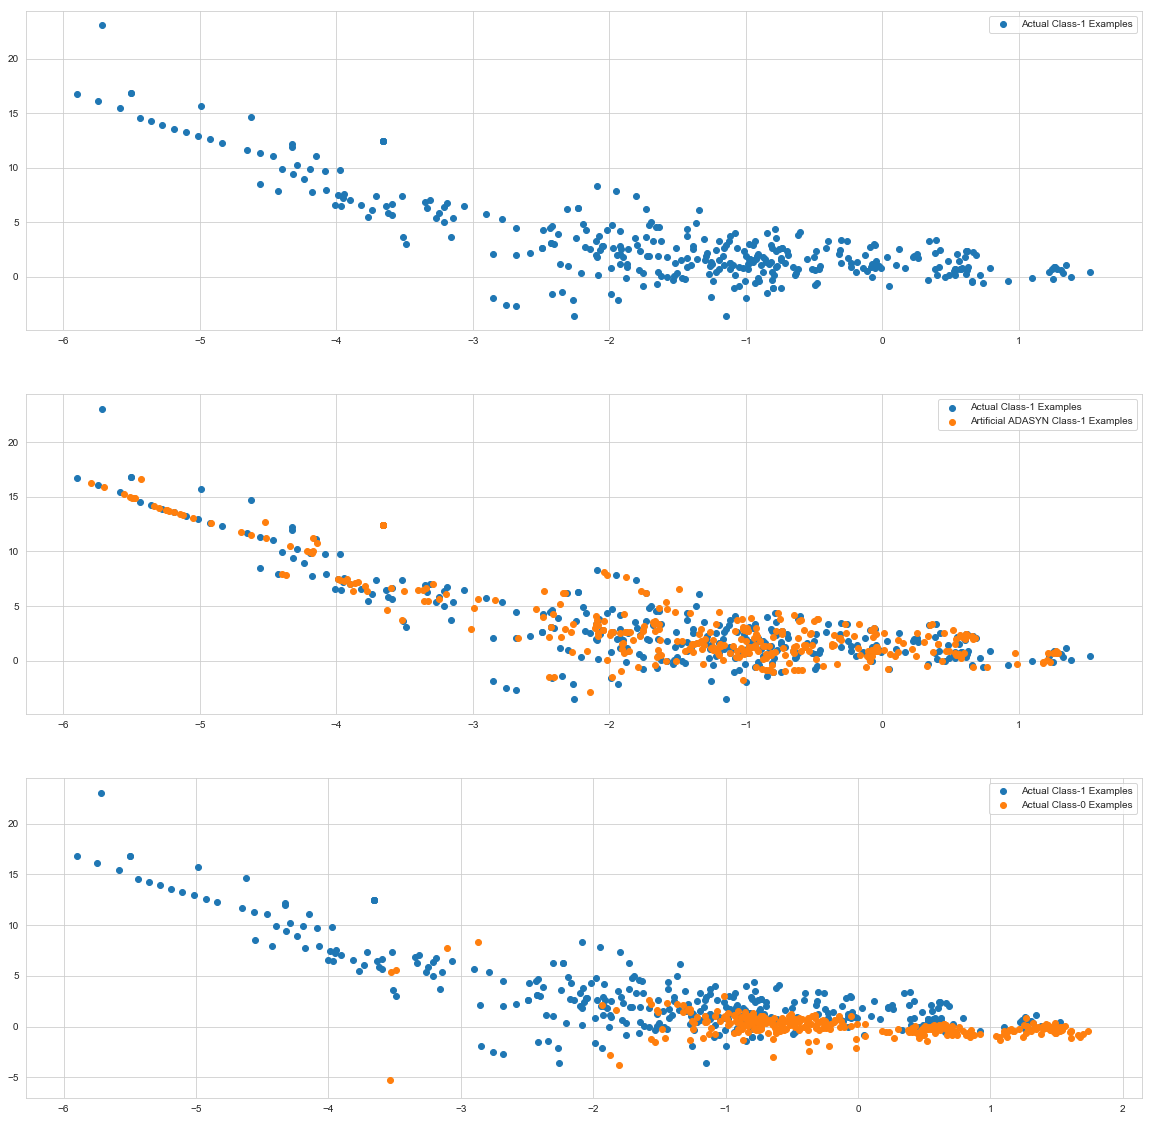

In [47]:
import warnings
warnings.filterwarnings("ignore")

# Apply ADASYN for treating class imbalance
adasyn = over_sampling.ADASYN(random_state=0)
# Fit and apply the transform
X_train_adasyn, y_train_adasyn = sm.fit_resample(X_train_tsf, y_train)

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train_tsf.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_tsf.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [39]:
# Convert arrays into dataframes

print('After ADASYN OverSampling, the shape of X_train: {}'.format(X_train_adasyn.shape))
print('After ADASYN OverSampling, the shape of y_train: {}'.format(y_train_adasyn.shape))

print("After ADASYN OverSampling, no. of Fraud records : {}".format(sum(y_train_adasyn==1)))
print("After ADASYN OverSampling, no. of Valid records : {}".format(sum(y_train_adasyn==0)))

# As we can see, both the number of fraud and valid records are same after running SMOTE oversampling

After ADASYN OverSampling, the shape of X_train: (398028, 29)
After ADASYN OverSampling, the shape of y_train: (398028,)
After ADASYN OverSampling, no. of Fraud records : 199014
After ADASYN OverSampling, no. of Valid records : 199014


In [ ]:
# Logistic Regression

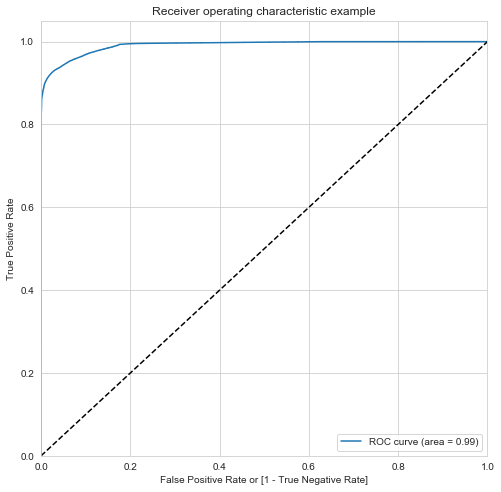

     prob   j_stats     sensi     speci
0.0   0.0  0.000000  1.000000  0.000000
0.1   0.1  0.817807  0.993287  0.824520
0.2   0.2  0.876074  0.962686  0.913388
0.3   0.3  0.892364  0.945999  0.946366
0.4   0.4  0.898540  0.934015  0.964525
0.5   0.5  0.900967  0.925563  0.975404
0.6   0.6  0.899288  0.916604  0.982685
0.7   0.7  0.895540  0.907650  0.987890
0.8   0.8  0.890731  0.898957  0.991774
0.9   0.9  0.879757  0.884802  0.994955


In [46]:
# Running Logistic regression and predicting on Train data 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection

LogReg = LogisticRegression()
LogReg.fit(X_train_adasyn,y_train_adasyn)
y_train_pred=pd.DataFrame()

# predicting probability on train data
prob = pd.DataFrame(LogReg.predict_proba(X_train_adasyn))[1]
y_train_pred_ad =pd.DataFrame()
y_train_pred_ad["Prob"] = prob
# Draw ROC AUC curve
draw_roc(y_train_adasyn,prob)

# Finding Optimal Cutoff Point by using Youden's J statistic.
# Youden's J statistic is calculated as sensitivity + specificity - 1, which specifies the distance between ROC curve and
# the chance line. The optimal threshold is that which maximises J Statistic.

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_ad[i]= y_train_pred_ad.Prob.map(lambda x: 1 if x > i else 0)
cutoff_df = pd.DataFrame( columns = ['prob','j_stats','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_adasyn, y_train_pred_ad[i] )
    total1=sum(sum(cm1))
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    j_stats = speci + sensi - 1
    cutoff_df.loc[i] =[ i ,j_stats,sensi,speci]
print(cutoff_df)


# The optimal threshold is 0.5 as the sesitivity (recall) & specificity both are high hence the J statistic is highest.

In [51]:
# Make predictions on Test data
y_test_pred_ad = pd.DataFrame()
y_test_pred_ad['lr_def_prob'] = pd.DataFrame(LogReg.predict_proba(X_test_tsf))[1]

# Classify transactions based on threshold value of 0.5
y_test_pred_ad['lr_def_pred'] = y_test_pred_ad.lr_def_prob.map(lambda x: 1 if x > 0.5 else 0)

print('AUC score for default Logistic Regression model is {:.4f}'.format(metrics.roc_auc_score( y_test, y_test_pred_ad['lr_def_pred'])))

# The AUC score using logistic regression model without any hyperparameter tuning is 0.9345

# Printing classification report
print(classification_report(y_test,y_test_pred_ad['lr_def_pred']))

# The recall is 0.89, this means model able to predict 89% of fraudulent transactions.

# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred_ad['lr_def_pred']))

# The model is able to predict 127 out of total 142 fraudulent cases.
# The model predicted high number of valid transactions as fraud i.e 2172. 
# Hence this model is not optimal.

AUC score for default Logistic Regression model is 0.9345
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85301
           1       0.06      0.89      0.10       142

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.97      0.99     85443

[[83129  2172]
 [   15   127]]


In [ ]:
# Decision Tree

In [50]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Instantiating decision tree model
dt_def_ad = DecisionTreeClassifier()
dt_def_ad.fit(X_train_adasyn, y_train_adasyn)

# Making predictions
y_test_pred_ad['dt_prob'] = pd.DataFrame(dt_def_ad.predict_proba(X_test_tsf))[1]
# Classify transactions based on threshold value of 0.5
y_test_pred_ad['dt_pred'] = y_test_pred_ad.dt_prob.map(lambda x: 1 if x > 0.5 else 0)

# metrics: AUC
print("AUC score {:.4f}".format(metrics.roc_auc_score(y_test, y_test_pred_ad['dt_pred'])))

# Printing classification report
print(classification_report(y_test, y_test_pred_ad['dt_pred']))

# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred_ad['dt_pred']))

# AUC score for default decision tree model is 0.8757.
# The recall is 0.75, this means model able to predict 75% of fraudulent transactions.
# Both AUC and recall of decision tree is lower than logistic regression model.

AUC score 0.8757
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.37      0.75      0.50       142

    accuracy                           1.00     85443
   macro avg       0.69      0.88      0.75     85443
weighted avg       1.00      1.00      1.00     85443

[[85121   180]
 [   35   107]]


In [52]:
# Random Forest

In [53]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc_ad = RandomForestClassifier(random_state=100)

# fit
rfc_ad.fit(X_train_adasyn,y_train_adasyn)

# Making predictions on Test data
y_test_pred_ad['rf_def_prob'] = pd.DataFrame(rfc_ad.predict_proba(X_test_tsf))[1]
y_test_pred_ad['rf_def_pred'] = y_test_pred_ad.rf_def_prob.map(lambda x: 1 if x > 0.5 else 0)

# metrics: AUC
print(metrics.roc_auc_score(y_test, y_test_pred_ad['rf_def_pred']))

# Printing classification report
print(classification_report(y_test,y_test_pred_ad['rf_def_pred']))

# AUC score for default decision tree model is 0.8907
# The recall is 0.78, this means model able to predict 78% of fraudulent transactions.

# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred_ad['rf_def_pred']))

# The model is able to predict 111 out of total 142 fraudulent cases.
# The model predicted only 24 valid transactions as fraud. 
# This model is better than the decision tree model & logistic regression model.

# Also one can notice that the output of this model is same as produced by SMOTE for Random Forest.

0.8907043921186467
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.82      0.78      0.80       142

    accuracy                           1.00     85443
   macro avg       0.91      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443

[[85277    24]
 [   31   111]]


In [54]:
# XGBoost

In [55]:
# fit model on training data with default hyperparameters

xgb_ad = XGBClassifier()

# Converting X_train_smote numpy array into dataframe type  
X_train_adasyn_df = pd.DataFrame(X_train_adasyn,columns=X_train_tsf.columns)

# fit the model on train data 
xgb_ad.fit(X_train_adasyn_df, y_train_adasyn)

# Make predictions on test data
# use predict_proba since we need probabilities to compute auc
y_test_pred_ad['xgb_def_prob'] = pd.DataFrame(xgb_ad.predict_proba(X_test_tsf))[1]
y_test_pred_ad['xgb_def_pred'] = y_test_pred_sm.xgb_def_prob.map(lambda x: 1 if x > 0.5 else 0)

# AUC SCORE
score = metrics.roc_auc_score(y_test, y_test_pred_ad['xgb_def_pred'])
print(score)

# Printing classification report
print(classification_report(y_test,y_test_pred_ad['xgb_def_pred']))


# AUC score is 0.9139 for XGBoost model with default hyperparameters. 
# The recall for default model is 84%

0.9139320807790672
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85301
           1       0.12      0.84      0.21       142

    accuracy                           0.99     85443
   macro avg       0.56      0.91      0.60     85443
weighted avg       1.00      0.99      0.99     85443



In [56]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred_ad['xgb_def_pred']))

# The model is able to predict 119 out of total 142 fraudulent cases.
# The model predicted 867 valid transactions as fraud. 

# Also one can notice that the output of this model is same as produced by SMOTE for Random Forest.

[[84434   867]
 [   23   119]]


In [ ]:
# Since SMOTE and ADASYN is giving same result for default Random Forest and default XGBoost model, we will run the 
# model with same set of tuned hyperparameters on adasyn balanced data
# to see if the result changes from the model run on SMOTE balanced data. 

In [57]:
# Fitting ADASYN balanced data with tuned hyperparameters
xgb_tuned_ad =XGBClassifier(learning_rate = 0.5,
                         subsample= 0.9, n_estimators = 100, max_depth = 15,random_state = 100)

xgb_tuned_ad.fit(X_train_adasyn_df, y_train_adasyn)

# Making predictions
y_test_pred_ad['xgb_tuned_prob'] = pd.DataFrame(xgb_tuned_ad.predict_proba(X_test_tsf))[1]
y_test_pred_ad['xgb_tuned_pred'] = y_test_pred_ad.xgb_tuned_prob.map(lambda x: 1 if x > 0.5 else 0)

# metrics: AUC
print(metrics.roc_auc_score(y_test, y_test_pred_ad['xgb_tuned_pred']))

# Printing classification report
print(classification_report(y_test,y_test_pred_ad['xgb_tuned_pred']))

# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred_ad['xgb_tuned_pred']))

# The recall for tuned XGBoost model is 83%.
# the AUC score for tuned random forest model is 0.9152 whereas for default it was 0.9139

# The model is able to predict 118 out of total 142 fraudulent cases.
# The model predicted only 35 valid transactions as fraud when compared to default [ which predicted 867]. 
# This model's AUC score and F1 score is best among all the models built using ADASYN balanced data.
# Hence this model is better than the random forest model and default XGBoost model.  

# You will notice that this model's result is exactly same as XGBoost hyperparameter tuned model with SMOTE balanced data.

# However both methods of oversampling produced same results for all models. Therefore we can choose either of the
# oversampling method.

0.9152878018866414
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.77      0.83      0.80       142

    accuracy                           1.00     85443
   macro avg       0.89      0.92      0.90     85443
weighted avg       1.00      1.00      1.00     85443

[[85266    35]
 [   24   118]]


# FINAL SELECTED MODEL

In [ ]:
# Considering only XGBoost model as the results produced by XGBoost model is best among all.

# Comparing XGBoost Model produced by Balanced data vs Imbalanced data

#                 XGBoost with imbalanced Data     XGBoost with balanced data
# Recall Score    82%                              83%
# AUC Score       0.90829                          0.91528
# True Positives  116                              118
# False Positives 27                               35   

# We can see XGBoost model produced with balanced data is better on parameters except for no. of FP cases.
# In this case of Credit Card fraud detection, we are giving higher weightage to predict more number of actual fraudulent transactions
# i.e True Positives; than the number of incorrectly predicted fraud transactions i.e False Positives. 
# 
# Hence we can see the model produced after balancing the train data by oversampling methods such as SMOTE & ADASYN is
# slightly better than the model produced by imbalanced train data [original data]

In [73]:
# As mentioned before, both methods of oversampling produced same results for all models. Therefore we can choose either of the
# oversampling method.

# The best model built is XGBoost tuned model with balanced data using SMOTE oversampling method with
# following parameters
print("Best Hyperparameters for Tuned XGBoost Model: \n {}\n".format(xgb_tuned_sm.get_params))
#learning_rate=0.5, max_depth=15, n_estimators=100, subsample=0.9

print("AUC score       : {}".format(metrics.roc_auc_score(y_test, y_test_pred_sm['xgb_tuned_pred'])))
print("Recall score    : {}".format(metrics.recall_score(y_test, y_test_pred_sm['xgb_tuned_pred'])))
print("Precision score : {}".format(metrics.precision_score(y_test, y_test_pred_sm['xgb_tuned_pred']))) 
print("Confusion Matrix: \n{}".format(metrics.confusion_matrix(y_test, y_test_pred_sm['xgb_tuned_pred']))) 


Best Hyperparameters for Tuned XGBoost Model: 
 <bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)>

AUC score       : 0.9152878018866414
Recall score    : 0.8309859154929577
Precision score : 0.7712418300653595
Confusion Matrix: 
[[85266    35]
 [   24   118]]


# COST BENEFIT ANALYSIS

In [153]:
# Creating a data frame combining X_test, y_test(containing original values) and y_test_pred_sm(containing predicted values)
Final_Test = X_test[['Amount']].merge(y_test,left_index=True,right_index=True) # Concatenating X_test and Y_test
Final_Test.reset_index(inplace=True) # resetting index values from 0
Final_Test['Pred_Class'] =  y_test_pred_sm['xgb_tuned_pred'] # Adding Predicted values for each transaction in test data


# The total amount of all correctly predicted fraud predictions i.e 118 transactions
print("1. Total amount of all predicted fraudulent transactions = ₹{:.2f}".format(sum(Final_Test[(Final_Test['Class']==1) & (Final_Test['Pred_Class']==1)]['Amount'])))

# The total amount of all fraud transactions were not flagged by the model i.e 24 transactions
print("2. Total amount of all fraudulent transactions which were not flagged by the model = ₹{:.2f}".format(sum(Final_Test[(Final_Test['Class']==1) & (Final_Test['Pred_Class']==0)]['Amount'])))

# At ₹ 10/call for the bank to make verification calls - Total call cost for all predicted cases 153*10
print("3. Call cost for all TP and FP: 153*10 = ₹1530")

# Total savings = Savings from correctly predicted transactions - 
# [the total loss fronm incorrectly predicted transactions + Call cost for all TP & FP]

print("4. Total Savings = ₹{:.2f}".format(11971.72 - 4020.10 - 1530))

1. Total amount of all predicted fraudulent transactions = ₹11971.72
2. Total amount of all fraudulent transactions which were not flagged by the model = ₹4020.10
3. Call cost for all TP and FP: 153*10 = ₹1530
4. Total Savings = ₹6421.62
